<a href="https://colab.research.google.com/github/EdwinVerdugo/Trabajo_de_Grado/blob/main/C%C3%B3digo1/Versi%C3%B3n_final_imputaci%C3%B3n_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación librerías
!pip install welly
!pip install lasio
!pip install wellpathpy
!pip install plotly
!pip install missingno
!pip install xlwt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split # Este modelo nos ayudara a hacer la división entre el modelo de training y de test
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sb

import random
from sklearn.metrics import r2_score
import pickle

## Import Libraries
from welly import Well
from welly import Curve
import pandas as pd
import numpy as np
import lasio
import pylab
# Plotly Imports
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Missing Data Using the Missingno Python Library
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import absolute
from scipy.stats import kstest
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Lectura archivos .las y visualizacion datos vacios
# ==============================================================================
import lasio
import missingno as msno

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import lasio
import pandas as pd

# Carga del archivo LAS
las_file = lasio.read("Parámetros Akacías 78 15-08-2022 0516h.las")

# Convertir los datos a un DataFrame de pandas
data_ins = las_file.df()

# Mostrar las primeras filas del DataFrame
data_ins.head()

,DBTM,DMEA,BLKPOS,ECD_T,HKLA,MDIA,MDOA,FLOWIN_T,ROP_T,RPM_T,SPP_T,TVA,TOR_T,WOB_T
TIME,,,,,,,,,,,,,,
0.0,-999.0,-999.0,-999.0,NaN,-999.0,8.7,8.7,0.0,-999.0,0.0,0.0,NaN,NaN,1237.6
0.5,-999.0,-999.0,-999.0,NaN,-999.0,8.7,8.7,0.0,-999.0,0.0,0.0,NaN,NaN,618.8
1.0,-999.0,-999.0,-999.0,NaN,-999.0,8.7,8.7,0.0,-999.0,0.0,0.0,NaN,-81.913,0.0
1.5,-499.5,-497.0,-469.5,NaN,-999.0,8.7,8.7,0.0,-499.5,0.0,0.0,NaN,-81.913,0.0
2.0,0.0,5.0,60.0,NaN,-999.0,8.7,8.7,0.0,0.0,0.0,0.0,NaN,-81.913,0.0


In [ ]:
import matplotlib.pyplot as plt

# Información básica sobre los datos
print(data_ins.info())

# Estadísticas descriptivas
print(data_ins.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 69447 entries, 0.0 to 34723.0
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DBTM      69059 non-null  float64
 1   DMEA      69052 non-null  float64
 2   BLKPOS    69052 non-null  float64
 3   ECD_T     46472 non-null  float64
 4   HKLA      69055 non-null  float64
 5   MDIA      68926 non-null  float64
 6   MDOA      68926 non-null  float64
 7   FLOWIN_T  69088 non-null  float64
 8   ROP_T     69052 non-null  float64
 9   RPM_T     68903 non-null  float64
 10  SPP_T     68925 non-null  float64
 11  TVA       47071 non-null  float64
 12  TOR_T     68921 non-null  float64
 13  WOB_T     69055 non-null  float64
dtypes: float64(14)
memory usage: 7.9 MB
None
                   DBTM              DMEA            BLKPOS             ECD_T  \
count  69059.0000000000  69052.0000000000  69052.0000000000  46472.0000000000   
mean    4248.1067787776   6508.1875863407     54.7822837079 

<Figure size 2000x1500 with 0 Axes>

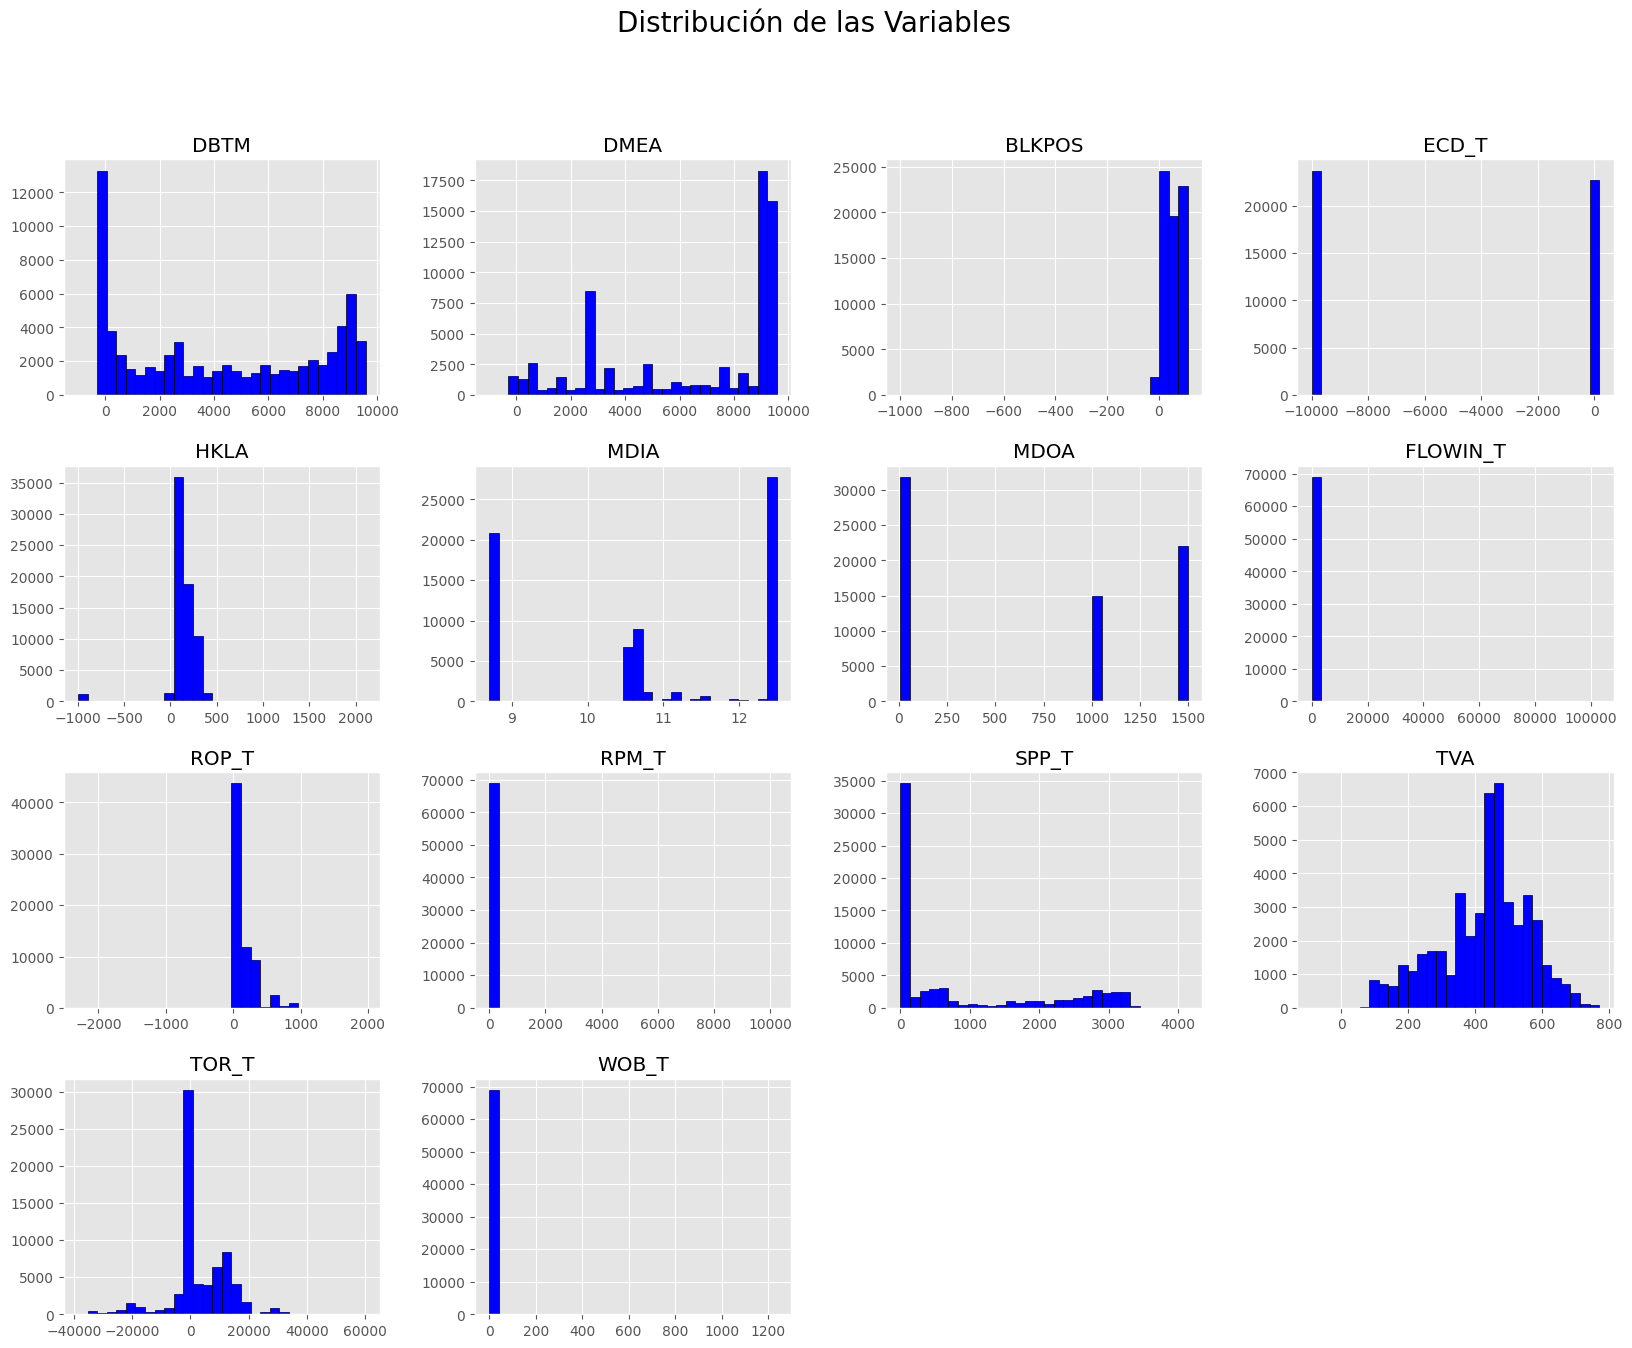

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta el tamaño de los gráficos
plt.figure(figsize=(20, 15))

# Crea un histograma para cada columna en el DataFrame
data_ins.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribución de las Variables', fontsize=20)
plt.show()


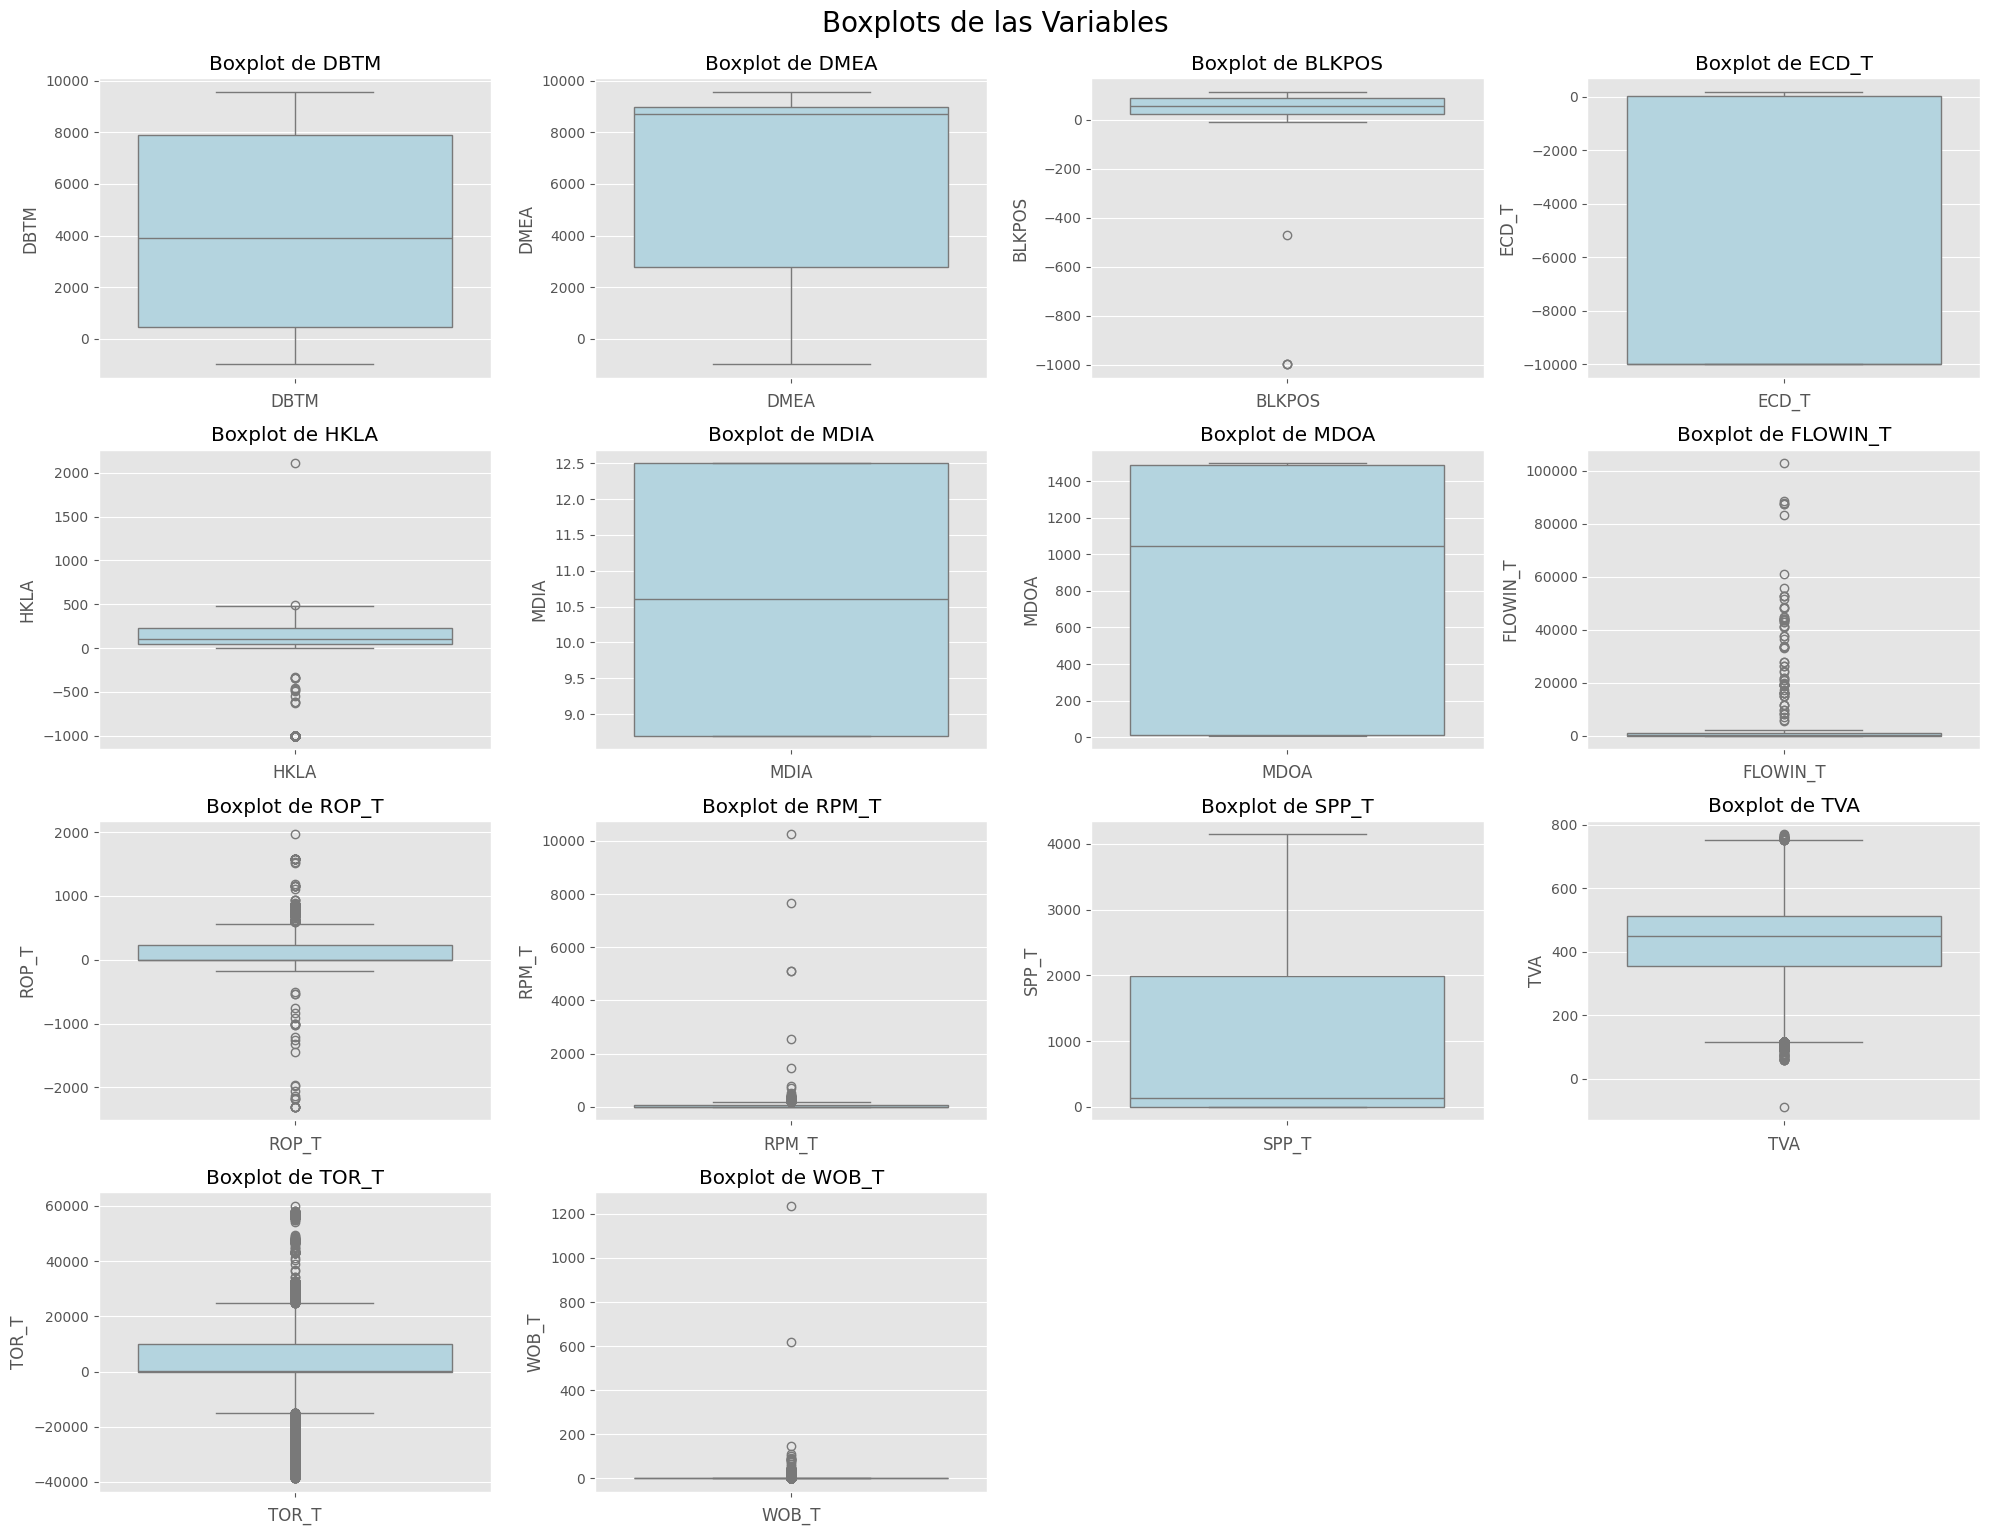

In [ ]:
# Ajusta el tamaño de los gráficos
plt.figure(figsize=(20, 15))

# Crea un boxplot para cada columna en el DataFrame
for i, column in enumerate(data_ins.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_ins[column], color='lightblue')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.suptitle('Boxplots de las Variables', fontsize=20, y=1.02)
plt.show()


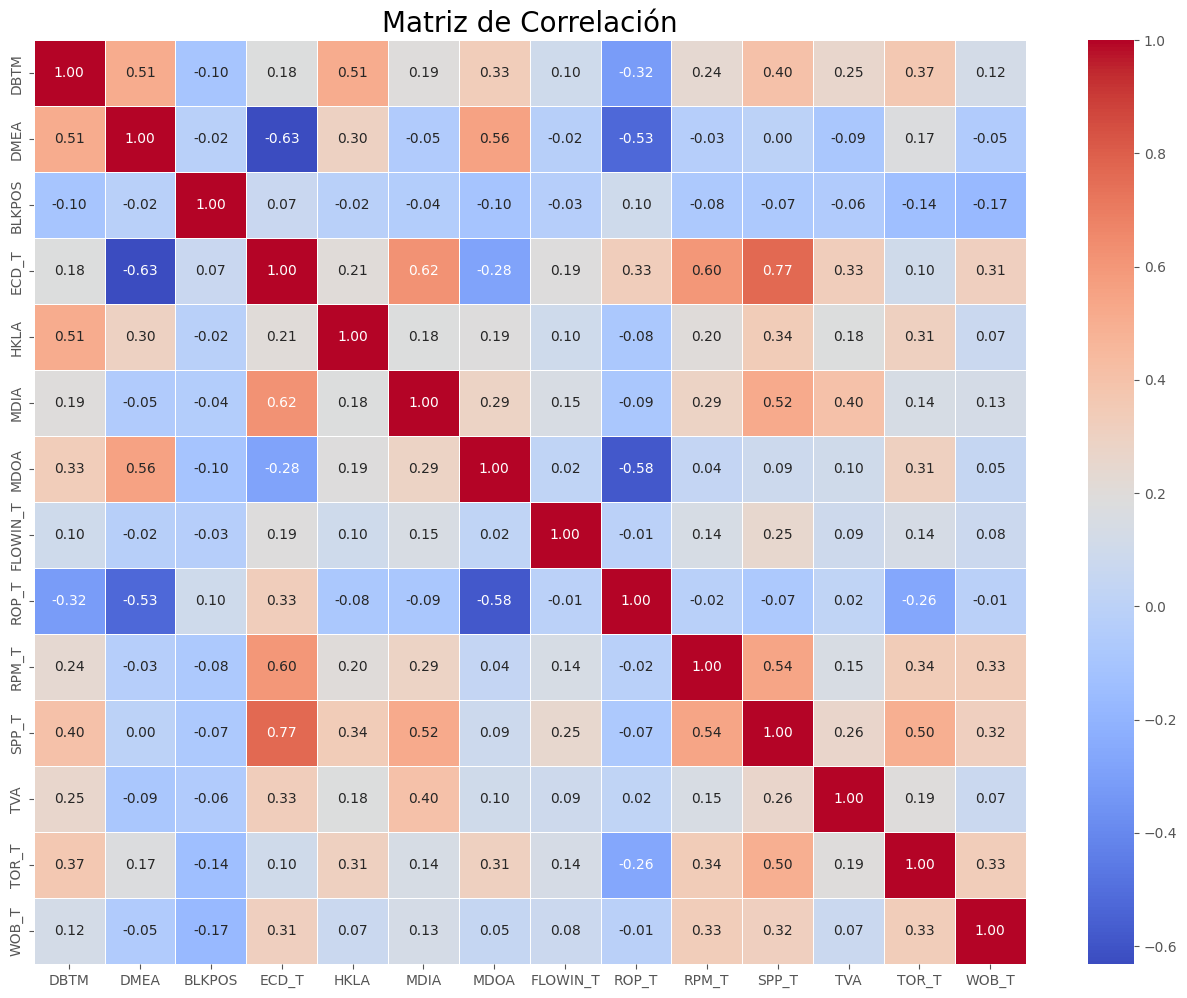

In [ ]:
# Calcula la matriz de correlación
corr_matrix = data_ins.corr()

# Ajusta el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crea el mapa de calor usando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación', fontsize=20)
plt.show()


In [ ]:
data_ins.isna().sum()

,0
DBTM,388
DMEA,395
BLKPOS,395
ECD_T,22975
HKLA,392
MDIA,521
MDOA,521
FLOWIN_T,359
ROP_T,395
RPM_T,544


<Axes: >

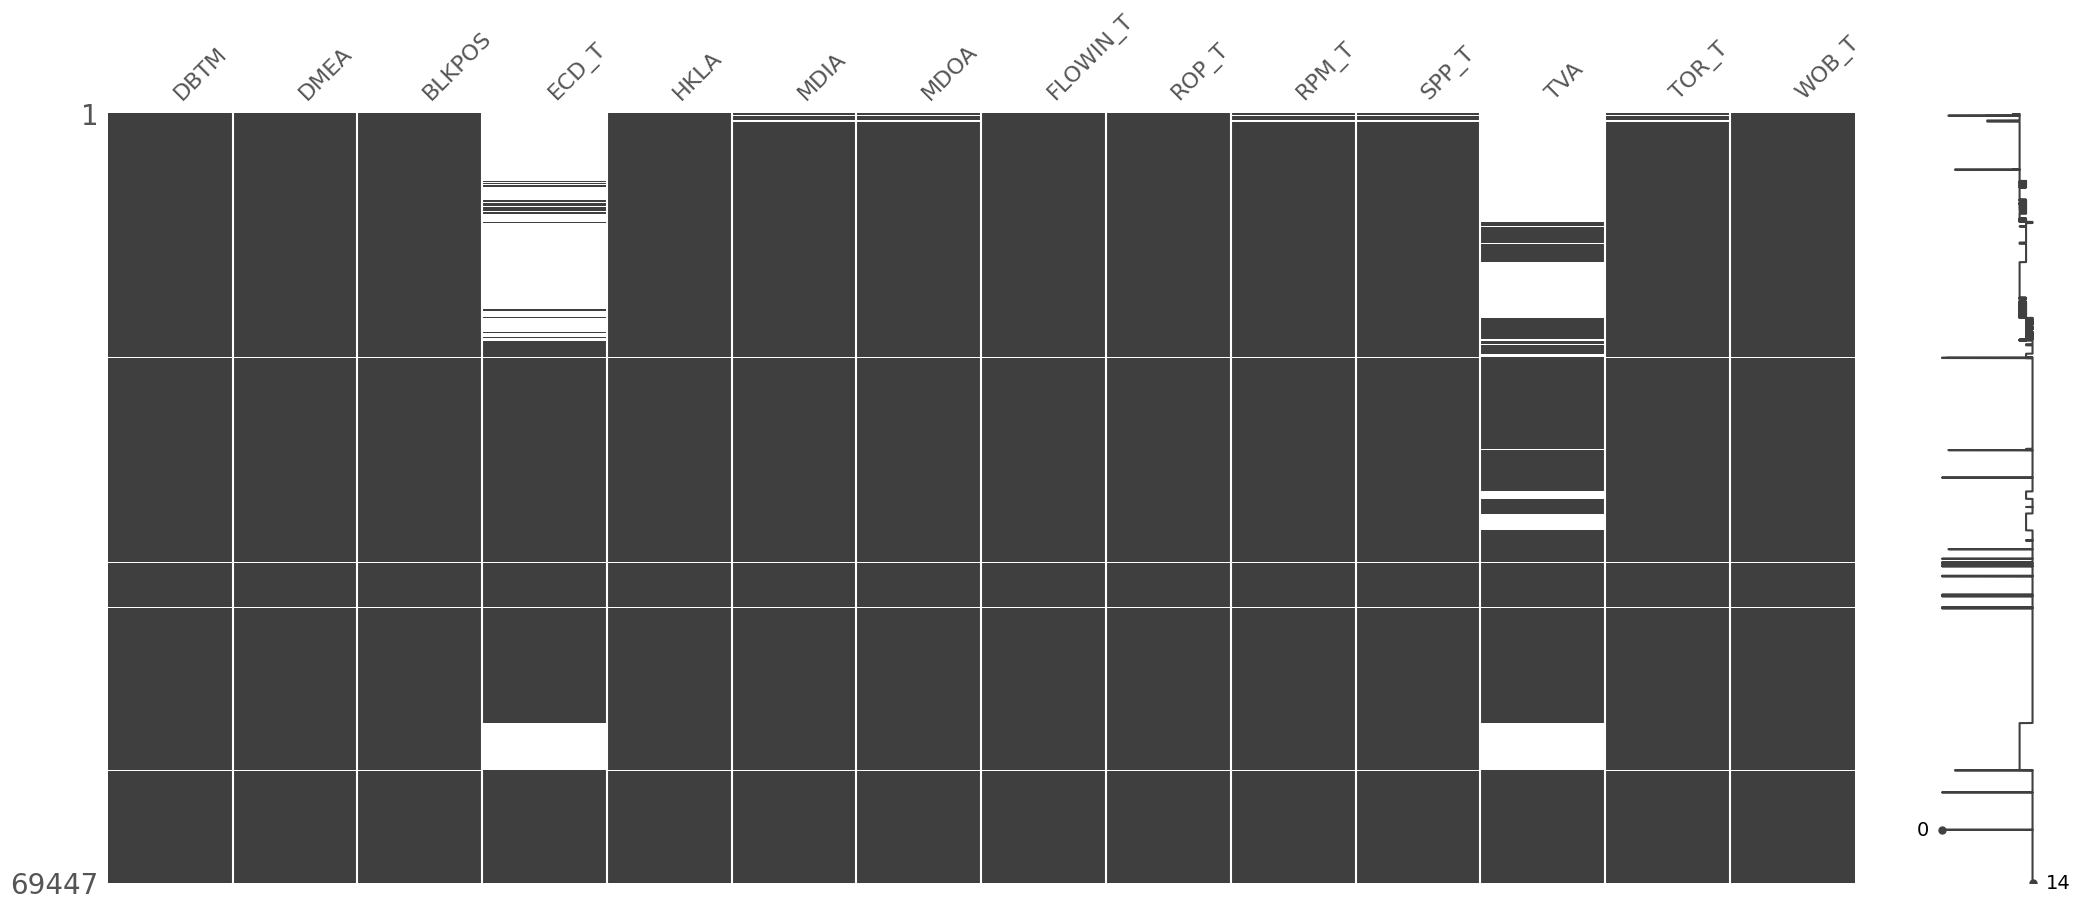

In [ ]:
msno.matrix(data_ins)

<Axes: >

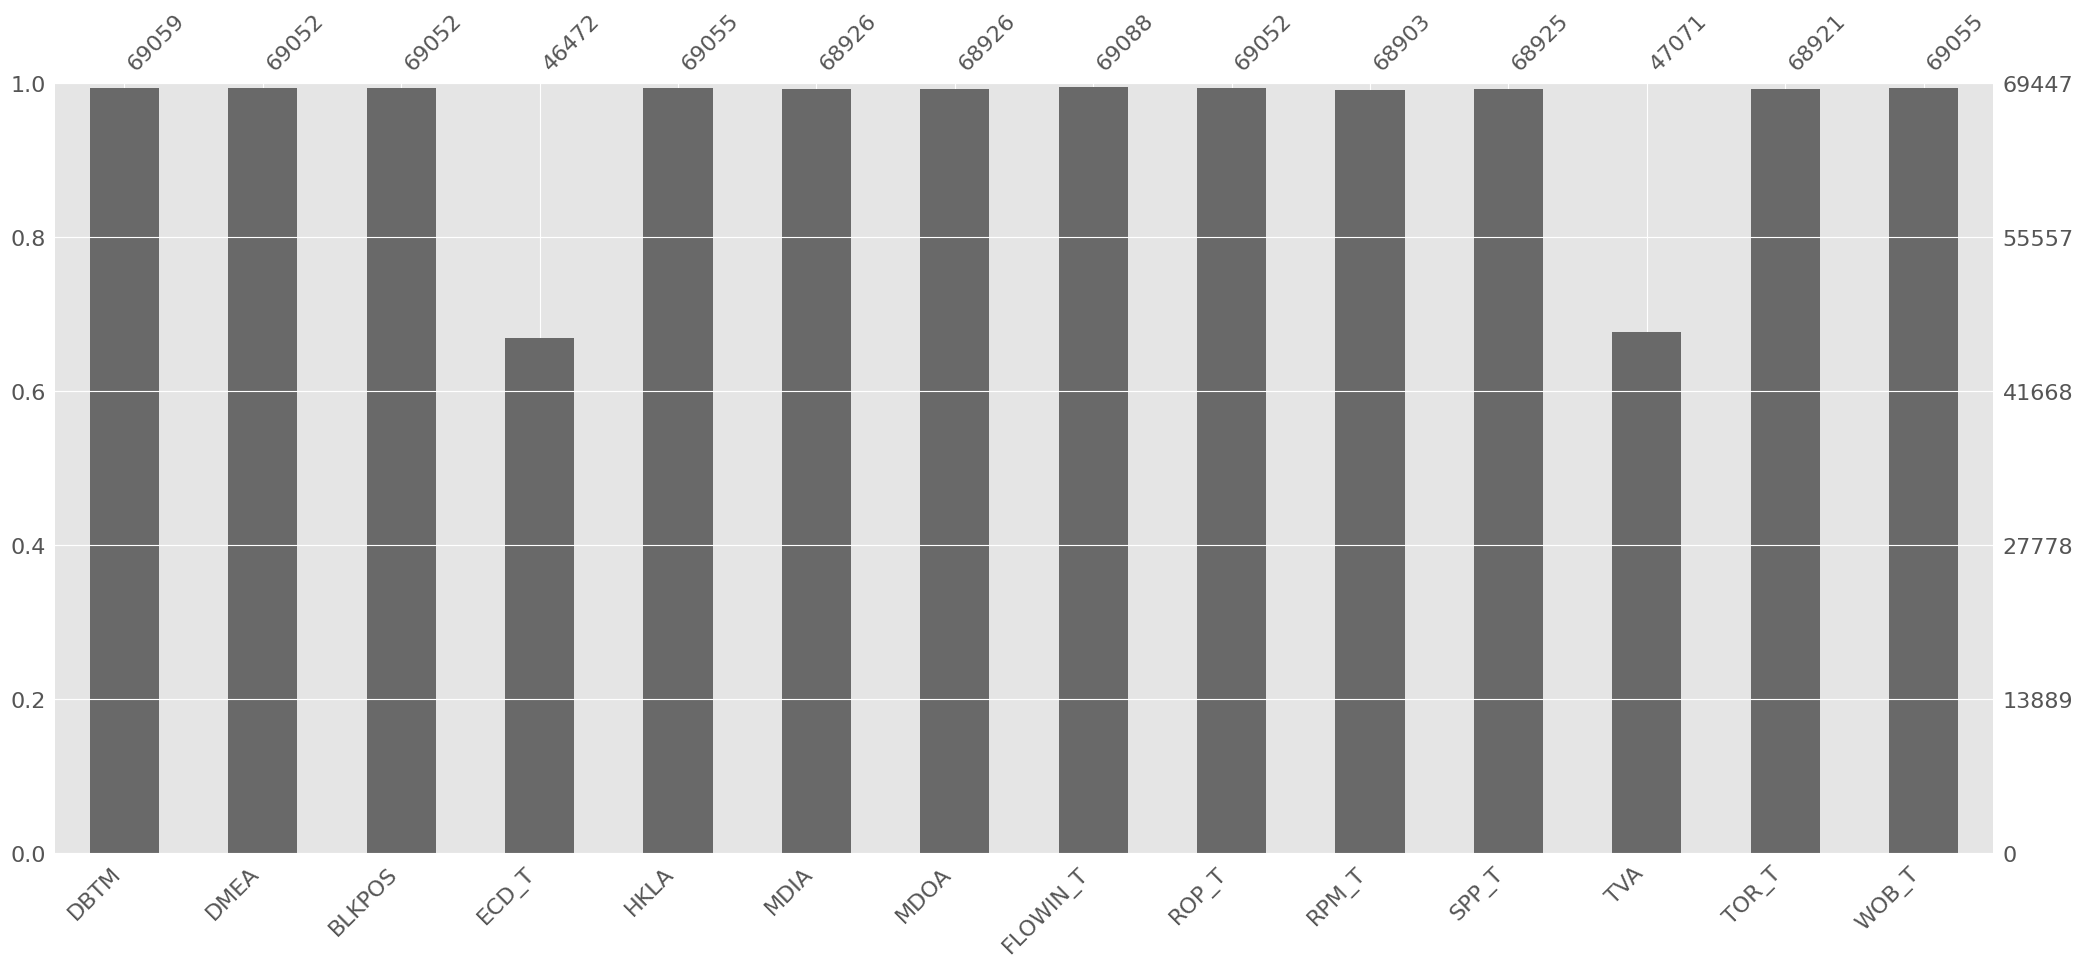

In [ ]:
msno.bar(data_ins)

In [ ]:
# Definimos una funcion para mostrar las tres graficas que nos ayudan a
# identificar outliers de forma rapida
def visualizaDistribucion(dataframe, variable):

    plt.figure(figsize=(25, 10))

    # histograma
    plt.subplot(2, 2, 1)
    sns.histplot(dataframe[variable], bins=50, kde=True)
    plt.title('Histograma')

    # Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(dataframe[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.title('Q-Q plot')

    # boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=dataframe[variable])
    plt.title('Boxplot')

    plt.show()

    print('Media',dataframe[variable].mean())
    print('STD',dataframe[variable].std())
    print('Mediana',dataframe[variable].median())

def visualizaSerie(serie):

    plt.figure(figsize=(25, 10))

    # histograma
    plt.subplot(2, 2, 1)
    sns.histplot(serie, bins=50, kde=True)
    plt.title('Histograma')

    # Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(serie, dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.title('Q-Q plot')

    # boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=serie)
    plt.title('Boxplot')

    plt.show()

    print('Media',serie.mean())
    print('STD',serie.std())
    print('Mediana',serie.median())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Crear una copia de data_ins para no modificar el original
data_set = data_ins.copy()
# Definir los rangos mínimos y máximos para cada variable
variable_ranges = {
    'DBTM': (0, 9572.02),
    'DMEA': (0, 9572.02),
    'BLKPOS': (0, 200),
    'ECD_T': (0, 14.9),
    'HKLA': (0, 255),
    'MDIA': (0, 12.5),
    'MDOA': (0, 12.5),
    'FLOWIN_T': (0, 951),
    'ROP_T': (0, 432),
    'RPM_T': (0, 194),
    'SPP_T': (0, 3334),
    'TVA': (0, 500),
    'TOR_T': (0, 23),
    'WOB_T': (0, 35.7)
}

# PARTE 1: Reemplazar outliers por NaN según los rangos proporcionados
for var, (min_val, max_val) in variable_ranges.items():
    if var in data_set.columns:
        data_set[var] = data_set[var].where(
            (data_set[var] >= min_val) & (data_set[var] <= max_val), np.nan
        )
    else:
        print(f"Advertencia: La variable '{var}' no se encuentra en el DataFrame.")

# PARTE 2: Imputar los valores NaN usando KNNImputer
# Seleccionar las columnas numéricas para la imputación
numeric_cols = data_set.select_dtypes(include=[np.number]).columns
# Escalar los datos antes de la imputación
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_set[numeric_cols])
# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Ajustar el imputador y transformar los datos
data_imputed_scaled = imputer.fit_transform(data_scaled)
# Invertir la escala para volver a los valores originales
data_imputed = scaler.inverse_transform(data_imputed_scaled)
# Convertir el resultado a un DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=numeric_cols, index=data_set.index)
# Actualizar data_set con los valores imputados
data_set[numeric_cols] = data_imputed_df


In [ ]:
data_set.describe()

,DBTM,DMEA,BLKPOS,ECD_T,HKLA,MDIA,MDOA,FLOWIN_T,ROP_T,RPM_T,SPP_T,TVA,TOR_T,WOB_T
count,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,69447.0000000000,6.9447000000e+04,69447.0000000000
mean,4247.0369410288,6510.1773571149,54.9446306098,12.3783968035,124.6519662928,10.8159529484,10.7827296350,343.3455808620,91.7217136046,39.0541776869,903.3878302718,386.0890258653,4.3561750689e+00,2.0820473848
std,3482.3535467983,3280.8162431562,34.5355486679,0.7701126905,78.7404669365,1.5795499183,1.5534869795,393.6837085705,118.6002096836,59.1588843977,1178.9952747733,88.9801644281,5.3916446635e+00,5.7888372172
min,0.0000000000,5.0000000000,0.2512000000,6.5700000000,1.4800000000,8.7000000000,8.7000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,59.1056000000,2.2204460493e-16,0.0000000000
25%,449.9400000000,2842.9150000000,22.4798000000,11.5690000000,50.3746000000,8.7000000000,8.7000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,355.7347200000,2.2204460493e-16,0.0000000000
50%,3934.5900000000,8633.1400000000,55.6322000000,12.8200000000,100.7650000000,10.6000000000,10.6000000000,141.0425000000,2.4400000000,0.0000000000,128.7160000000,412.0455000000,2.0124600000e+00,0.0000000000
75%,7857.7575000000,8999.0200000000,90.1506500000,12.9300000000,201.1578500000,12.5000000000,12.5000000000,856.2118000000,189.0000000000,79.0167000000,1965.3025000000,451.2311000000,7.0535800000e+00,0.0000000000
max,9572.0200000000,9572.0200000000,114.1200000000,14.8500000000,255.0000000000,12.5000000000,12.5000000000,948.2203000000,432.0000000000,193.1072000000,3332.9280000000,499.9895000000,2.2998800000e+01,35.4339000000


<Figure size 2000x1500 with 0 Axes>

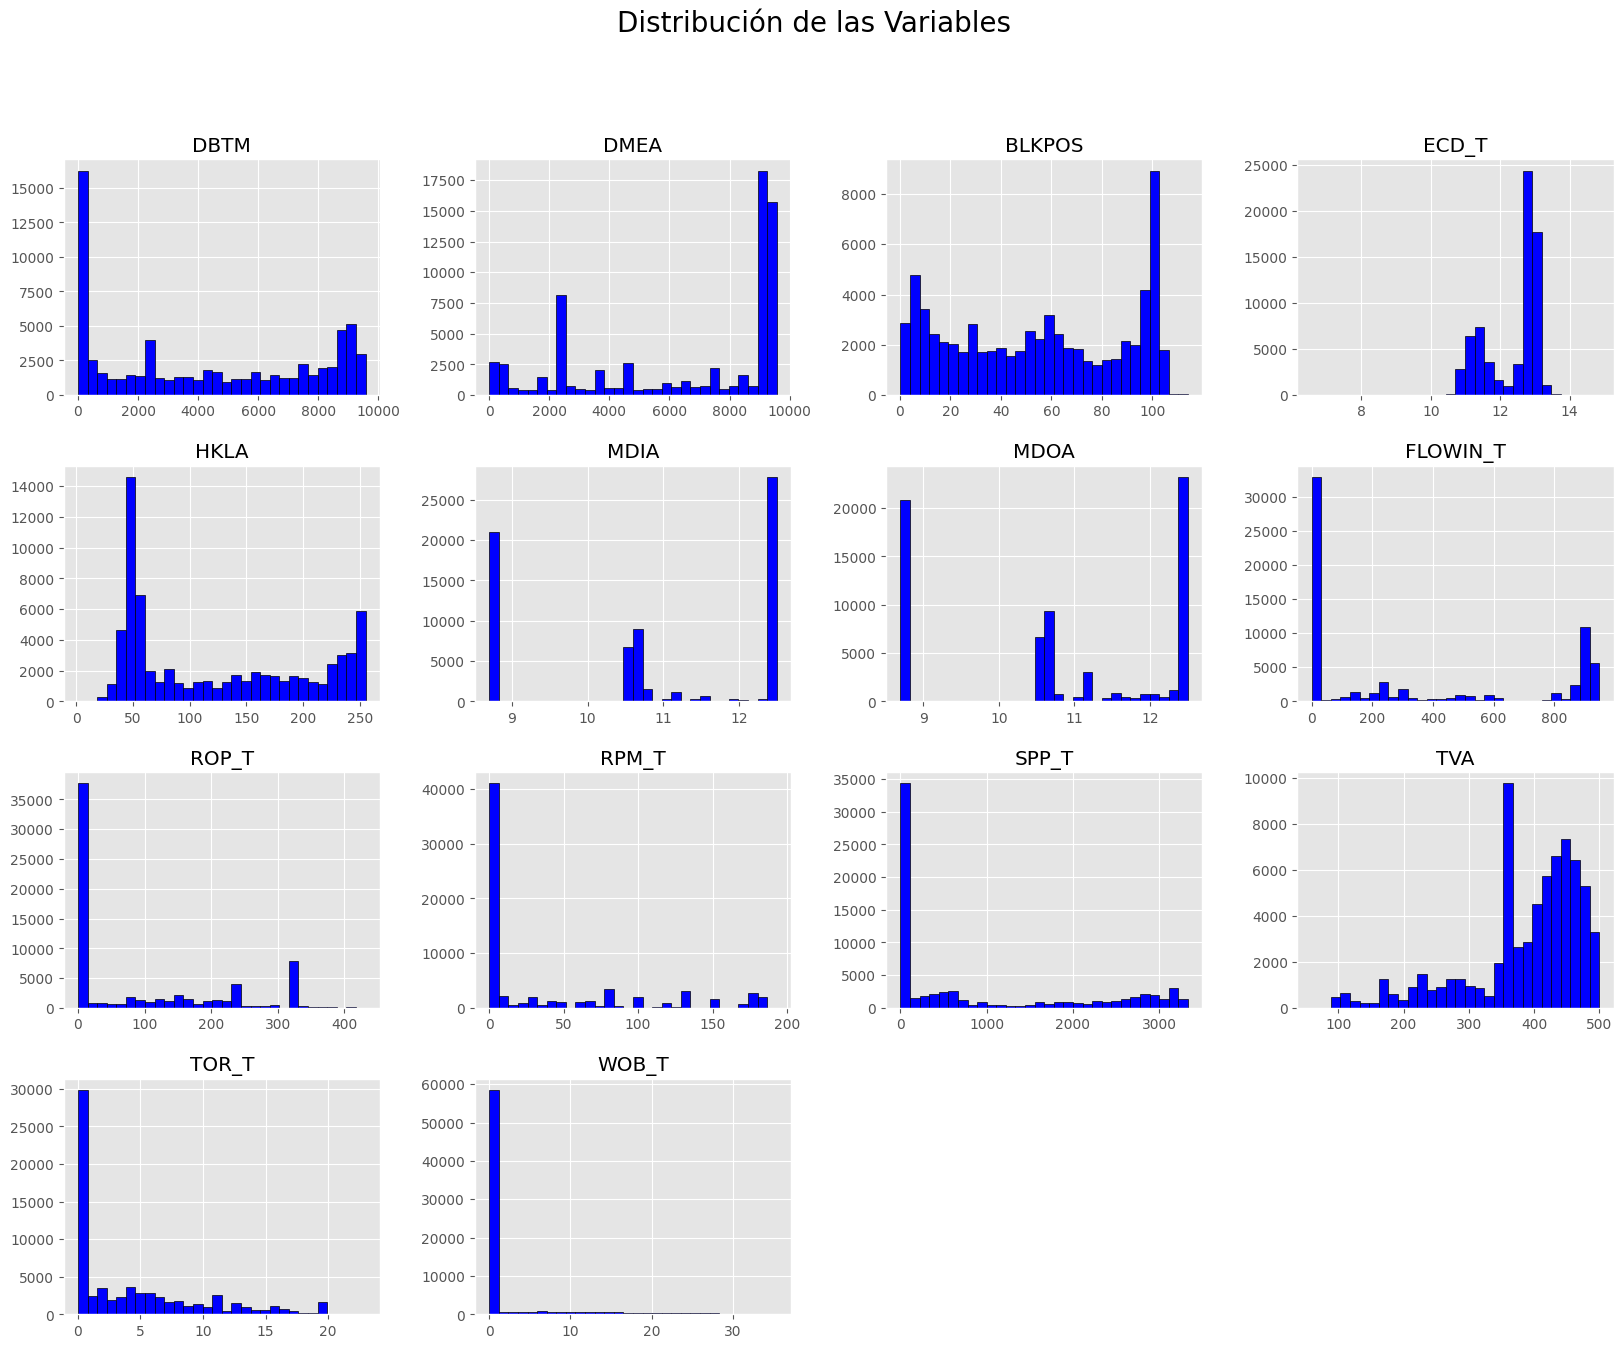

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusta el tamaño de los gráficos
plt.figure(figsize=(20, 15))

# Crea un histograma para cada columna en el DataFrame
data_set.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribución de las Variables', fontsize=20)
plt.show()

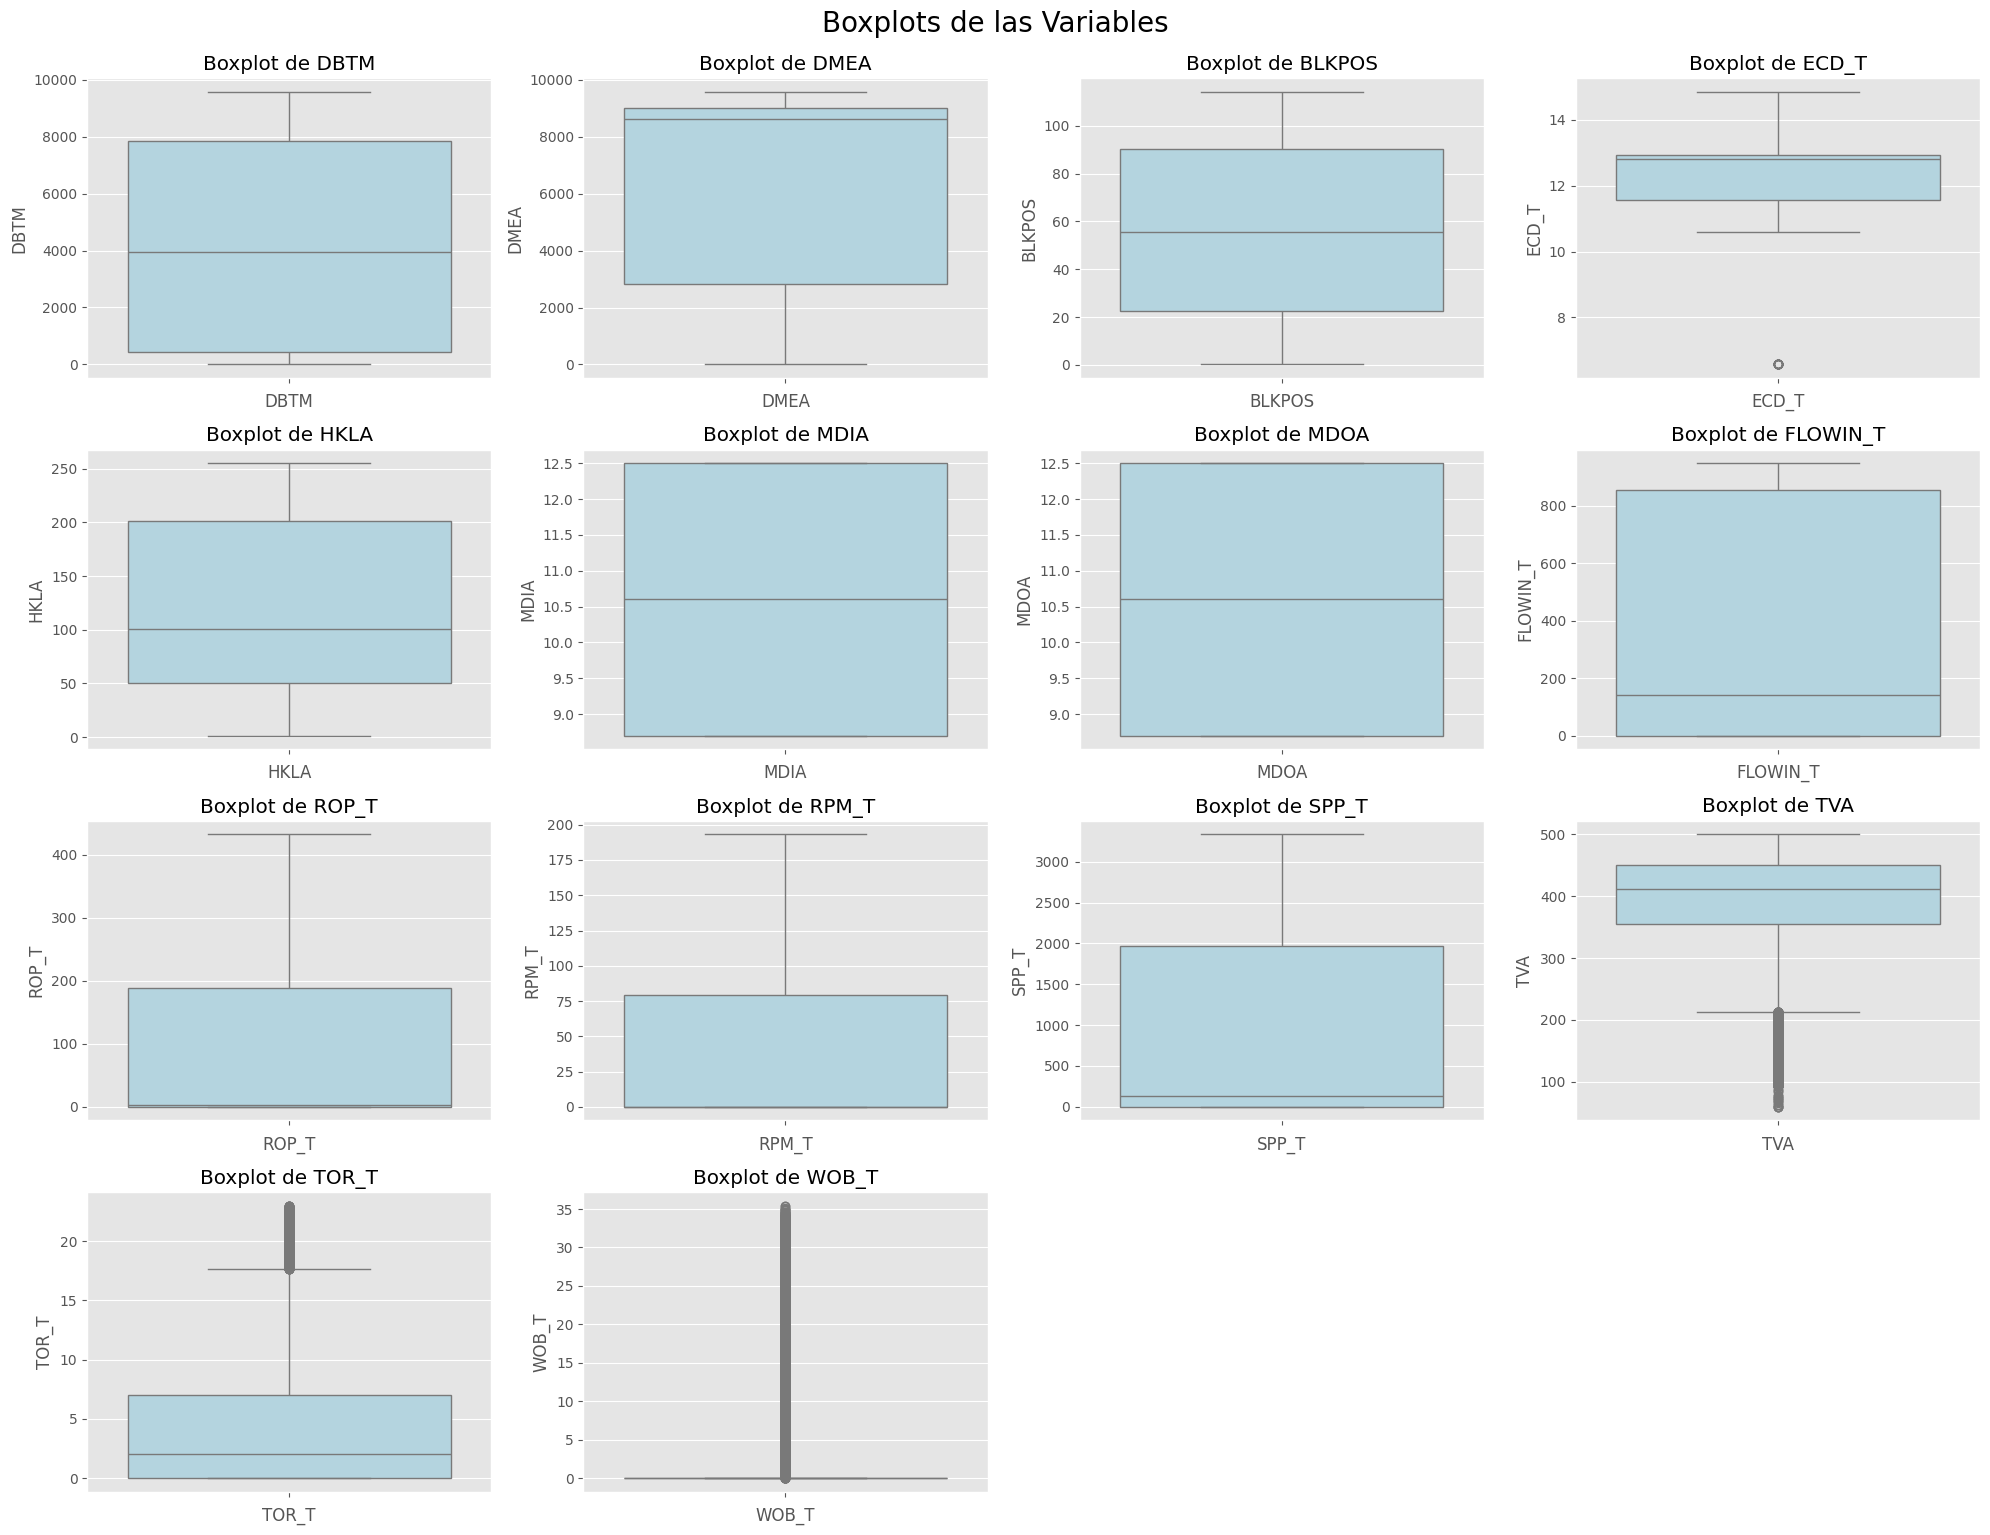

In [ ]:
# Ajusta el tamaño de los gráficos
plt.figure(figsize=(20, 15))

# Crea un boxplot para cada columna en el DataFrame
for i, column in enumerate(data_set.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_set[column], color='lightblue')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.suptitle('Boxplots de las Variables', fontsize=20, y=1.02)
plt.show()

In [ ]:
df=data_set

In [ ]:
# Crear la nueva columna (Columna4) con los valores especificados
df['D_Broca'] = 0  # Inicializar con ceros
# Definir los valores específicos y umbrales
valor_1 = 17.5
umbral_1 = 2550
valor_2 = 12.25
umbral_2 = 8999
valor_3 = 8.5
umbral_3 = 9570
# Asignar valores según las condiciones
df.loc[df['DMEA'] <= umbral_1, 'D_Broca'] = valor_1
df.loc[(df['DMEA'] > umbral_1) & (df['DMEA'] <= umbral_2), 'D_Broca'] = valor_2
df.loc[df['DMEA'] > umbral_2, 'D_Broca'] = valor_3

# Verificar el resultado
print(df.head())

           DBTM     DMEA    BLKPOS   ECD_T      HKLA  MDIA  MDOA  FLOWIN_T  \
TIME                                                                         
0.0   7735.1286  8999.02  79.48546  11.154  64.33830   8.7   8.7       0.0   
0.5   7735.1286  8999.02  79.48546  11.154  64.33830   8.7   8.7       0.0   
1.0   1296.0924  8999.02  80.60170  11.168  82.28162   8.7   8.7       0.0   
1.5   1296.0924  8999.02  80.60170  11.168  82.28162   8.7   8.7       0.0   
2.0      0.0000     5.00  60.00000  11.468  46.50000   8.7   8.7       0.0   

      ROP_T  RPM_T  SPP_T        TVA             TOR_T  WOB_T  D_Broca  
TIME                                                                    
0.0     0.0    0.0    0.0  374.72178  2.2204460493e-16    0.0      8.5  
0.5     0.0    0.0    0.0  374.72178  2.2204460493e-16    0.0      8.5  
1.0     0.0    0.0    0.0  373.02884  2.2204460493e-16    0.0      8.5  
1.5     0.0    0.0    0.0  373.02884  2.2204460493e-16    0.0      8.5  
2.0     0.0    

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Paso 1: Imputación de valores nulos usando KNNImputer
# Seleccionar las columnas necesarias para el cálculo de MSE
columnas_relevantes = ['ROP_T', 'RPM_T', 'D_Broca', 'WOB_T', 'TOR_T']

# Crear un imputador KNN
imputer_knn = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes
df_imputado = df.copy()
df_imputado[columnas_relevantes] = imputer_knn.fit_transform(df[columnas_relevantes])

# Paso 2: Definir la función para calcular la MSE con los datos imputados
def calcular_mse(row):
    if row['ROP_T'] <= 0 or row['RPM_T'] <= 0 or row['D_Broca'] <= 0 or row['WOB_T'] <= 0:
        return 0
    mse = (((480 * row['TOR_T'] * row['RPM_T']) / ((row['D_Broca']**2) * row['ROP_T'])) +
           ((4 * row['WOB_T']) / (math.pi * (row['D_Broca']**2))))
    return mse

# Paso 3: Aplicar la función a cada fila del DataFrame imputado
df_imputado['MSE'] = df_imputado.apply(lambda row: calcular_mse(row), axis=1)

# Verificar la columna MSE
print(df_imputado[['ROP_T', 'RPM_T', 'D_Broca', 'WOB_T', 'MSE']].head())


      ROP_T  RPM_T  D_Broca  WOB_T  MSE
TIME                                   
0.0     0.0    0.0      8.5    0.0  0.0
0.5     0.0    0.0      8.5    0.0  0.0
1.0     0.0    0.0      8.5    0.0  0.0
1.5     0.0    0.0      8.5    0.0  0.0
2.0     0.0    0.0     17.5    0.0  0.0


In [ ]:
# Verificar el número de valores NaN en cada columna
na_counts = df_imputado.isna().sum()

# Mostrar el resultado
print("Número de valores NaN por columna:")
print(na_counts)


Número de valores NaN por columna:
DBTM        0
DMEA        0
BLKPOS      0
ECD_T       0
HKLA        0
MDIA        0
MDOA        0
FLOWIN_T    0
ROP_T       0
RPM_T       0
SPP_T       0
TVA         0
TOR_T       0
WOB_T       0
D_Broca     0
MSE         0
dtype: int64


In [ ]:
# Verificar la cantidad total de datos en cada columna
total_counts = df_imputado.count()

# Mostrar el resultado
print("Cantidad total de datos por columna (valores no nulos):")
print(total_counts)


Cantidad total de datos por columna (valores no nulos):
DBTM        69447
DMEA        69447
BLKPOS      69447
ECD_T       69447
HKLA        69447
MDIA        69447
MDOA        69447
FLOWIN_T    69447
ROP_T       69447
RPM_T       69447
SPP_T       69447
TVA         69447
TOR_T       69447
WOB_T       69447
D_Broca     69447
MSE         69447
dtype: int64


Correlación de MSE con otras variables:
MSE         1.0000000000
RPM_T       0.3142707966
SPP_T       0.2391679241
WOB_T       0.2173962148
FLOWIN_T    0.2117665405
HKLA        0.1594813265
TVA         0.1413503102
MDOA        0.1187257156
MDIA        0.1167146989
DBTM        0.1107395532
D_Broca     0.0932001530
TOR_T       0.0928156602
ECD_T       0.0255482263
DMEA        0.0002226592
ROP_T      -0.0456713463
BLKPOS     -0.0647747294
Name: MSE, dtype: float64

Correlación de ROP_T con otras variables:
ROP_T       1.0000000000
D_Broca     0.3988948531
TOR_T       0.2944630208
BLKPOS      0.1101545515
WOB_T       0.1009758631
FLOWIN_T    0.0173168169
TVA         0.0101444991
RPM_T      -0.0307989464
MSE        -0.0456713463
SPP_T      -0.0714482844
MDOA       -0.1097549375
MDIA       -0.1192897304
HKLA       -0.2695204628
DBTM       -0.4152469150
DMEA       -0.5972041602
ECD_T      -0.7462151408
Name: ROP_T, dtype: float64


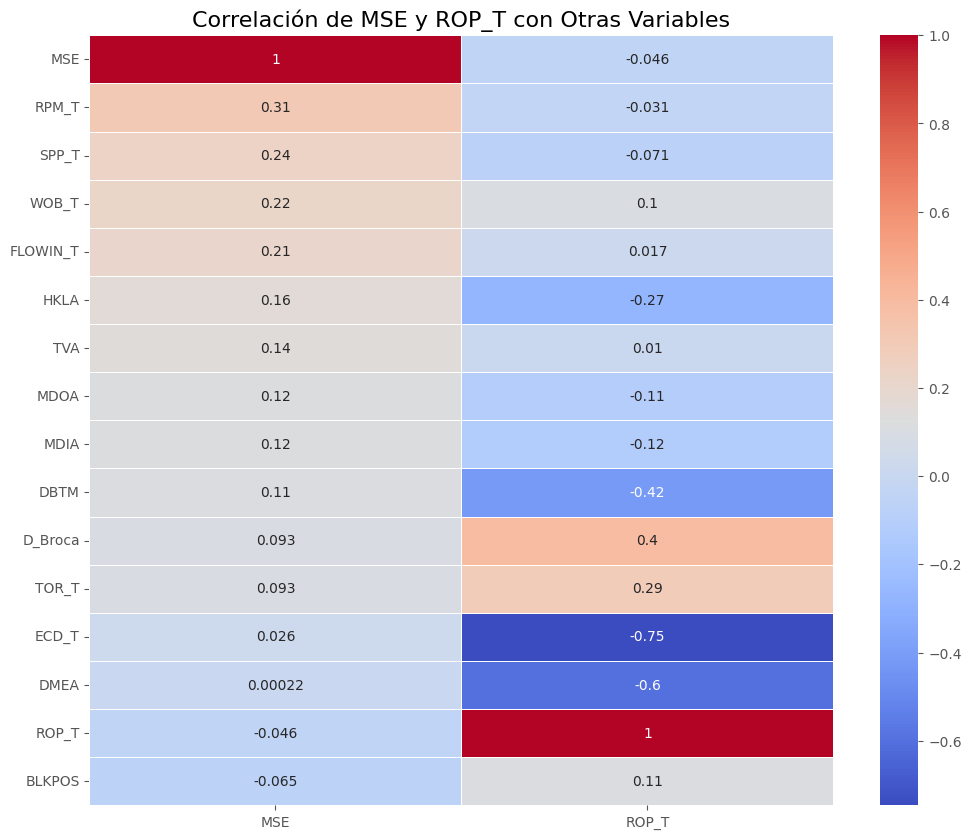

In [ ]:
#-----------------------------------------------
df_cleaned = df_imputado

# 1. Cálculo de la matriz de correlación
correlation_matrix = df_cleaned.corr()

# 2. Extracción de la correlación de MSE y ROP_T con otras variables
mse_correlation = correlation_matrix['MSE'].sort_values(ascending=False)
rop_correlation = correlation_matrix['ROP_T'].sort_values(ascending=False)

# Mostrar la correlación de MSE y ROP_T con otras variables
print("Correlación de MSE con otras variables:")
print(mse_correlation)

print("\nCorrelación de ROP_T con otras variables:")
print(rop_correlation)

# 4. Visualización de la correlación de MSE y ROP_T con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['MSE', 'ROP_T']].sort_values(by=['MSE', 'ROP_T'], ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación de MSE y ROP_T con Otras Variables', fontsize=16)
plt.show()


In [ ]:
df_1 = df_cleaned


In [ ]:
#Creación del PRIMER dataframe utilizando la filtración de variables por relevancia (CORRELACIÓN CON VARIABLES OBJETIVO:0.1)
#----------------------------------------------------------------------------------------------------------------------
# Verificar si las columnas MSE y ROP_T están en el DataFrame
if 'MSE' not in df_1.columns or 'ROP_T' not in df_1.columns:
    raise ValueError("Las columnas 'MSE' o 'ROP_T' no se encuentran en el DataFrame.")

# 1. Establecer un umbral de correlación ajustado a 0.1
umbral = 0.1

# 2. Identificación de variables relevantes para MSE y ROP_T
mse_correlation = df_1.corr()['MSE'].dropna()  # Calcular correlación con MSE
rop_correlation = df_1.corr()['ROP_T'].dropna()  # Calcular correlación con ROP_T

variables_relevantes_mse = mse_correlation[abs(mse_correlation) > umbral].index
variables_relevantes_rop = rop_correlation[abs(rop_correlation) > umbral].index

# Combinar las variables relevantes para ambas variables objetivo
variables_relevantes = set(variables_relevantes_mse).union(set(variables_relevantes_rop))

# Convertir el conjunto a una lista
variables_relevantes = list(variables_relevantes)

print(f"Variables relevantes para MSE o ROP_T con correlación > {umbral}:")
print(variables_relevantes)

# 3. Crear un DataFrame con solo las variables relevantes con Correlación 0.1
df_relevante_v1 = df_1[variables_relevantes]

# Verificar el nuevo DataFrame procesado
print("\nDataFrame con variables relevantes basado en correlación:")
print(df_relevante_v1.info())

Variables relevantes para MSE o ROP_T con correlación > 0.1:
['ECD_T', 'RPM_T', 'D_Broca', 'MSE', 'DBTM', 'MDOA', 'HKLA', 'DMEA', 'TOR_T', 'SPP_T', 'ROP_T', 'FLOWIN_T', 'TVA', 'BLKPOS', 'MDIA', 'WOB_T']

DataFrame con variables relevantes basado en correlación:
<class 'pandas.core.frame.DataFrame'>
Index: 69447 entries, 0.0 to 34723.0
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ECD_T     69447 non-null  float64
 1   RPM_T     69447 non-null  float64
 2   D_Broca   69447 non-null  float64
 3   MSE       69447 non-null  float64
 4   DBTM      69447 non-null  float64
 5   MDOA      69447 non-null  float64
 6   HKLA      69447 non-null  float64
 7   DMEA      69447 non-null  float64
 8   TOR_T     69447 non-null  float64
 9   SPP_T     69447 non-null  float64
 10  ROP_T     69447 non-null  float64
 11  FLOWIN_T  69447 non-null  float64
 12  TVA       69447 non-null  float64
 13  BLKPOS    69447 non-null  float64
 14  M

In [ ]:
# Eliminación de filas duplicadas
df_relevante_v1_sin_duplicados = df_relevante_v1.drop_duplicates(subset=df_relevante_v1.columns.difference(['TIME']))

#  Verificación del DataFrame después de eliminar duplicados
print("DataFrame después de eliminar filas duplicadas (sin considerar TIME):")
print(df_relevante_v1_sin_duplicados.info())

DataFrame después de eliminar filas duplicadas (sin considerar TIME):
<class 'pandas.core.frame.DataFrame'>
Index: 66333 entries, 0.0 to 34723.0
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ECD_T     66333 non-null  float64
 1   RPM_T     66333 non-null  float64
 2   D_Broca   66333 non-null  float64
 3   MSE       66333 non-null  float64
 4   DBTM      66333 non-null  float64
 5   MDOA      66333 non-null  float64
 6   HKLA      66333 non-null  float64
 7   DMEA      66333 non-null  float64
 8   TOR_T     66333 non-null  float64
 9   SPP_T     66333 non-null  float64
 10  ROP_T     66333 non-null  float64
 11  FLOWIN_T  66333 non-null  float64
 12  TVA       66333 non-null  float64
 13  BLKPOS    66333 non-null  float64
 14  MDIA      66333 non-null  float64
 15  WOB_T     66333 non-null  float64
dtypes: float64(16)
memory usage: 8.6 MB
None


In [ ]:
#  Verificación de que todas las columnas tengan el mismo número de datos
print("\nVerificación de la consistencia en el número de datos por columna:")
print(df_relevante_v1_sin_duplicados.count())


Verificación de la consistencia en el número de datos por columna:
ECD_T       66333
RPM_T       66333
D_Broca     66333
MSE         66333
DBTM        66333
MDOA        66333
HKLA        66333
DMEA        66333
TOR_T       66333
SPP_T       66333
ROP_T       66333
FLOWIN_T    66333
TVA         66333
BLKPOS      66333
MDIA        66333
WOB_T       66333
dtype: int64


In [ ]:
# 8. Verificación final de que no existan valores nulos
print("\nVerificación final de valores nulos en el DataFrame escalado:")
print(df_relevante_v1_sin_duplicados.isnull().sum())

# 9. Resumen final del DataFrame escalado
print("\nResumen final del DataFrame escalado:")
print(df_relevante_v1_sin_duplicados.describe())



Verificación final de valores nulos en el DataFrame escalado:
ECD_T       0
RPM_T       0
D_Broca     0
MSE         0
DBTM        0
MDOA        0
HKLA        0
DMEA        0
TOR_T       0
SPP_T       0
ROP_T       0
FLOWIN_T    0
TVA         0
BLKPOS      0
MDIA        0
WOB_T       0
dtype: int64

Resumen final del DataFrame escalado:
                  ECD_T             RPM_T           D_Broca               MSE  \
count  66333.0000000000  66333.0000000000  66333.0000000000  66333.0000000000   
mean      12.4131232054     40.7111496347     11.1086563249      5.0934266702   
std        0.7584293475     59.9717411370      2.9034932173     29.2327319090   
min        6.5700000000      0.0000000000      8.5000000000      0.0000000000   
25%       11.6400000000      0.0000000000      8.5000000000      0.0000000000   
50%       12.8400000000      0.0000000000     12.2500000000      0.0000000000   
75%       12.9340000000     79.9774000000     12.2500000000      0.0000000000   
max       14.

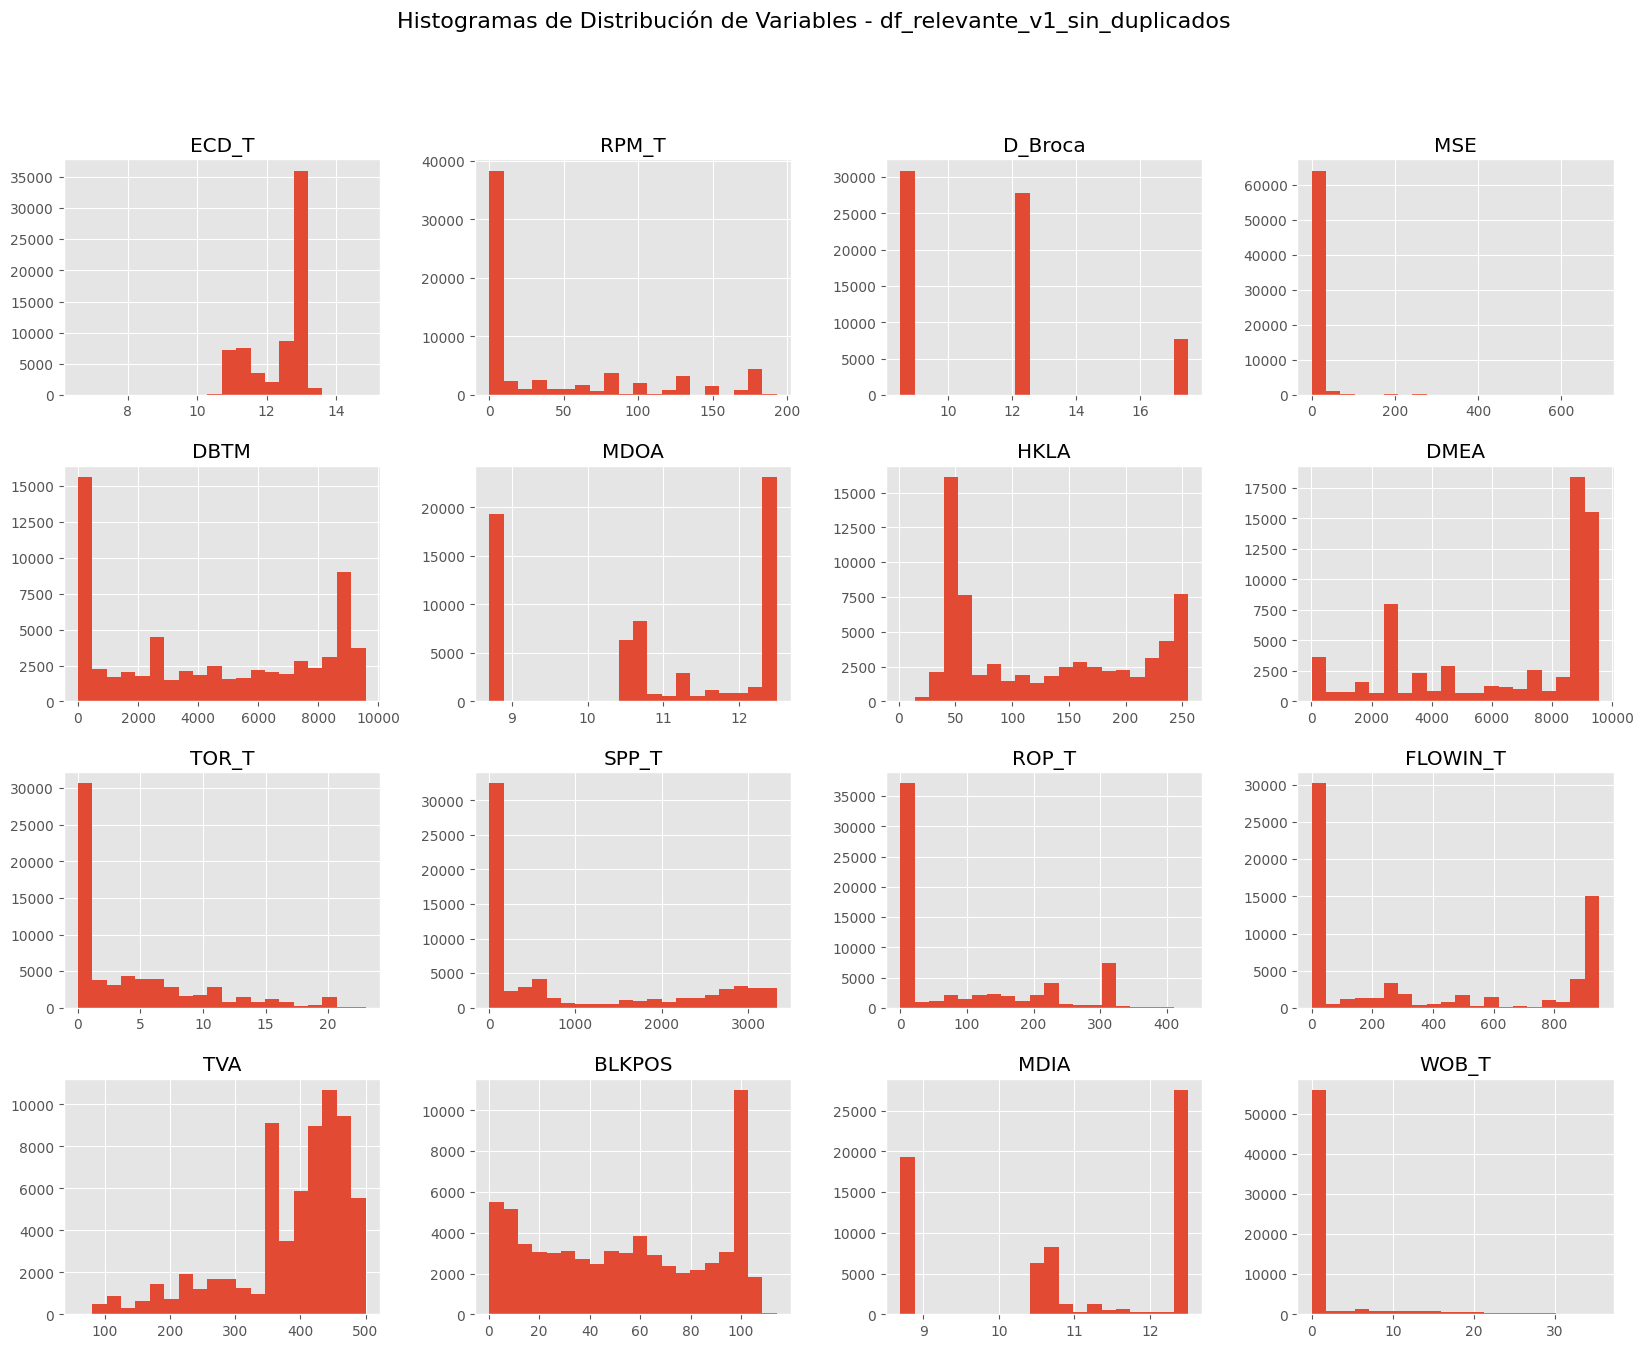

In [ ]:
import matplotlib.pyplot as plt

# Generar histogramas para cada variable en el DataFrame df_relevante_v1_sin_duplicados
df_relevante_v1_sin_duplicados.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramas de Distribución de Variables - df_relevante_v1_sin_duplicados", fontsize=16)
plt.show()

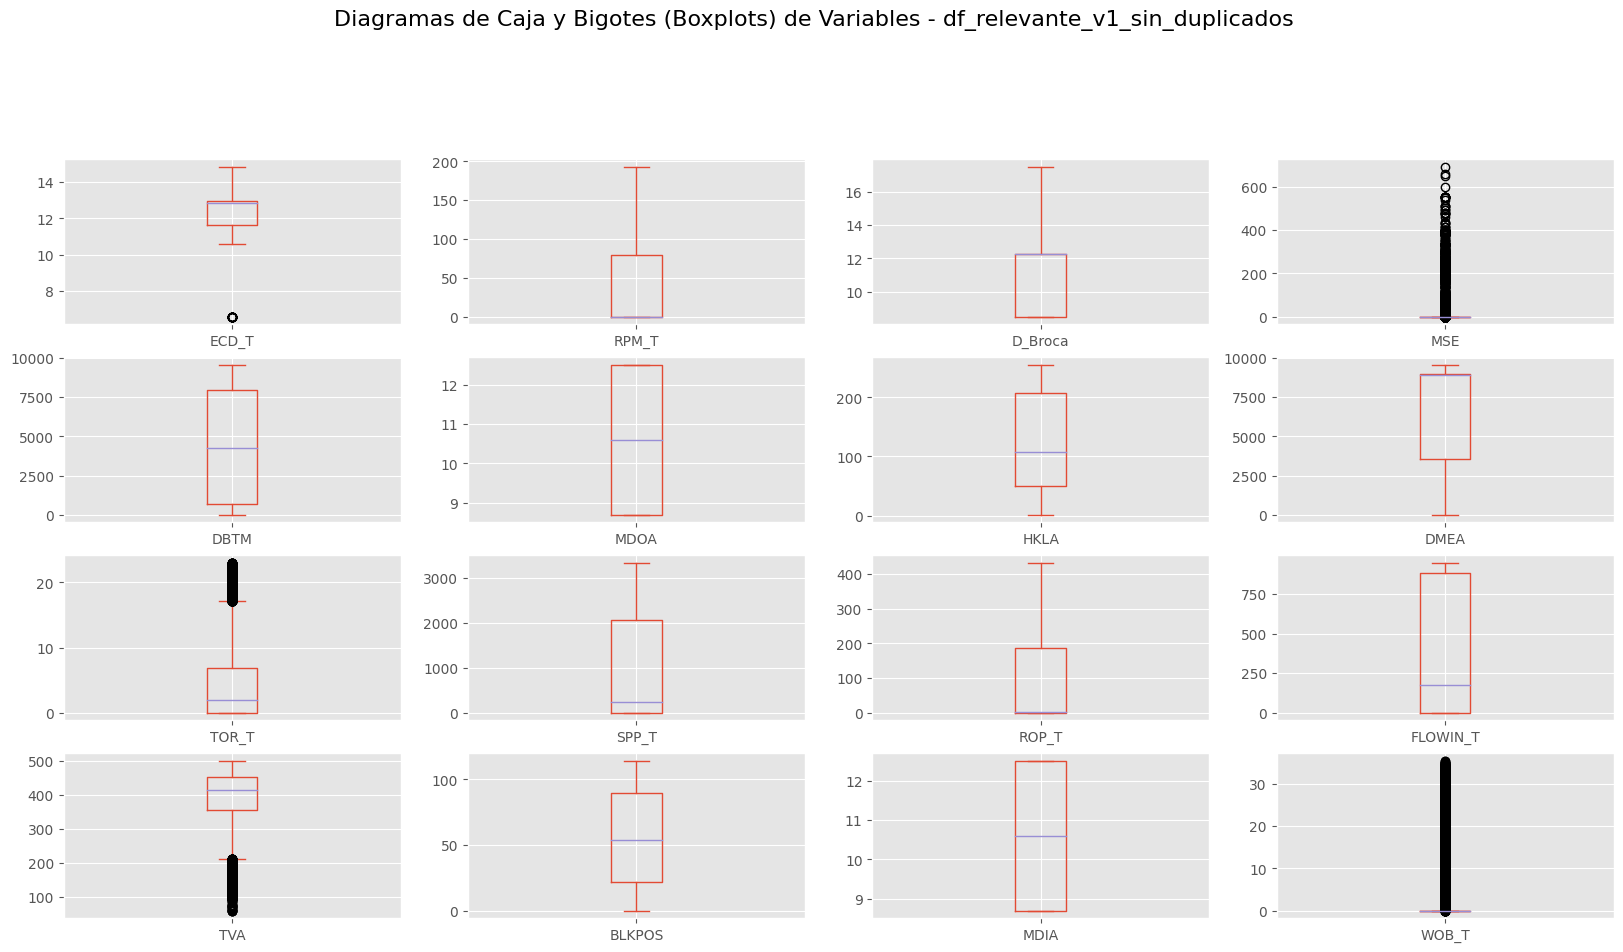

In [ ]:
# Generar boxplots para cada variable en el DataFrame df_relevante_v1_sin_duplicados
df_relevante_v1_sin_duplicados.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle("Diagramas de Caja y Bigotes (Boxplots) de Variables - df_relevante_v1_sin_duplicados", fontsize=16)
plt.show()


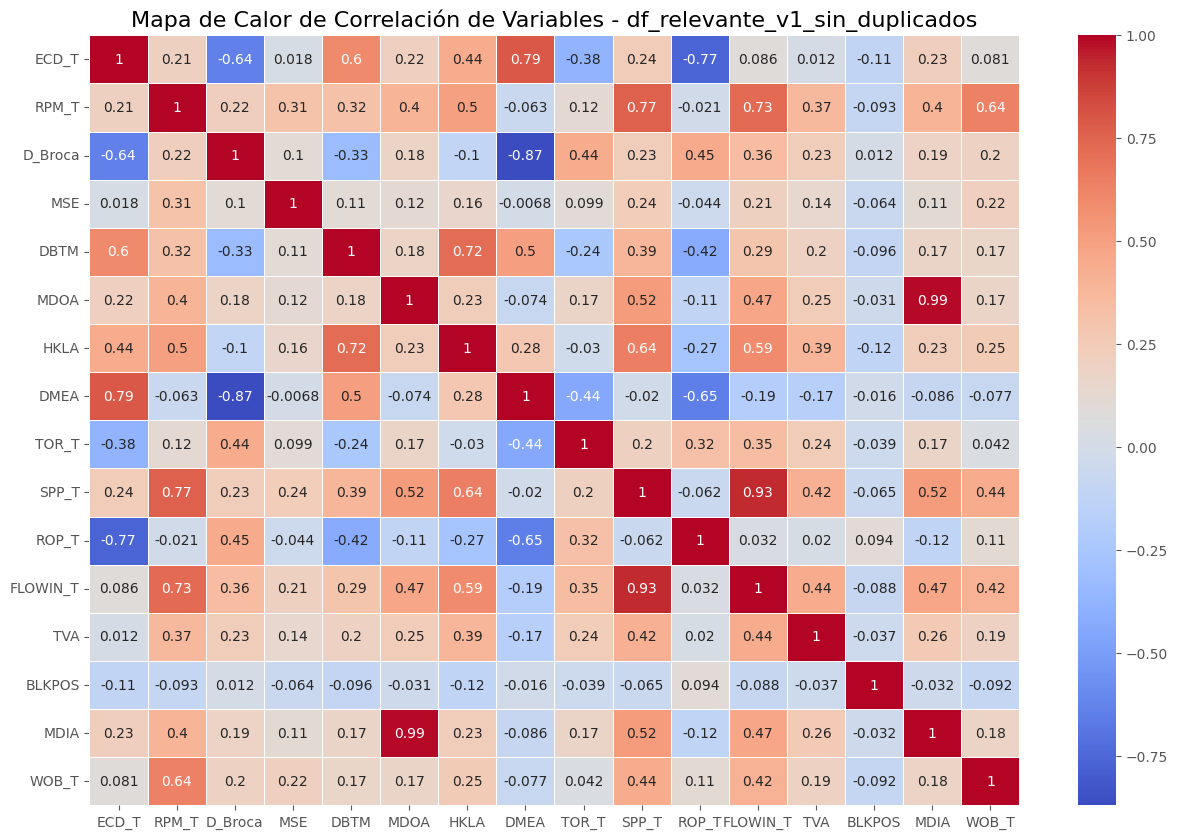

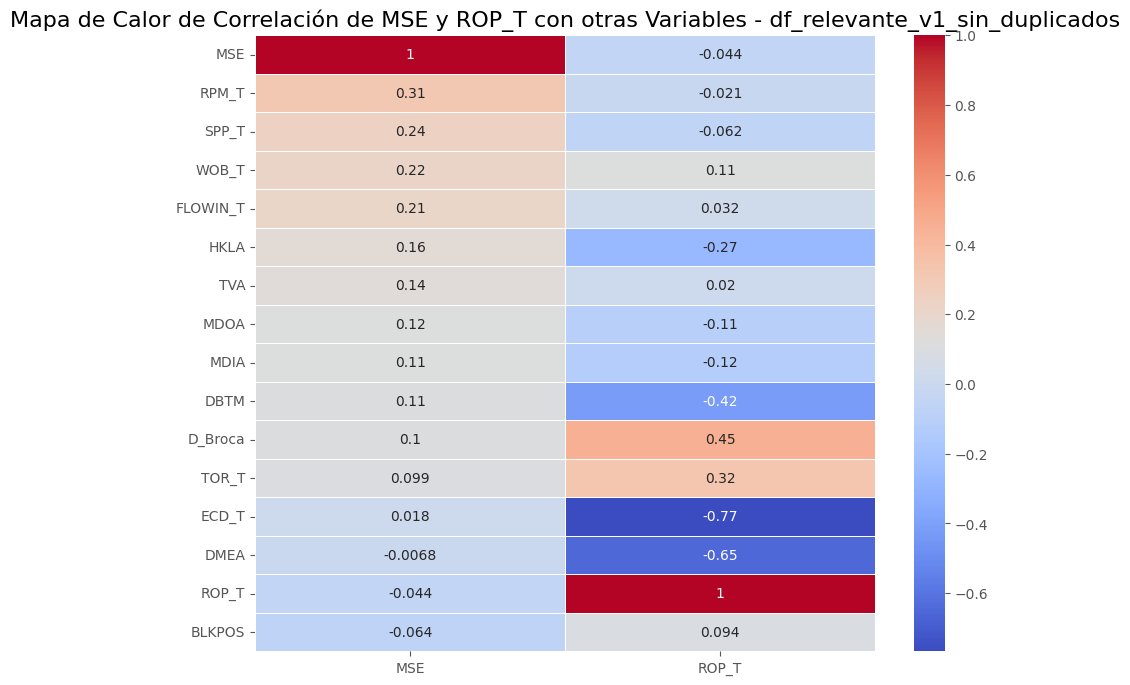

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación para df_relevante_v1_sin_duplicados
correlation_matrix_relevante = df_relevante_v1_sin_duplicados.corr()

# Generar un mapa de calor para la correlación de todas las variables en df_relevante_v1_sin_duplicados
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_relevante, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de Variables - df_relevante_v1_sin_duplicados", fontsize=16)
plt.show()

# Generar un mapa de calor específico para las correlaciones de MSE y ROP_T con otras variables en df_relevante_v1_sin_duplicados
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevante[['MSE', 'ROP_T']].sort_values(by='MSE', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de MSE y ROP_T con otras Variables - df_relevante_v1_sin_duplicados", fontsize=16)
plt.show()

In [ ]:
#Creación del SEGUNDO dataframe utilizando la filtración de variables por relevancia (CORRELACIÓN CON VARIABLES OBJETIVO:0.2)
#----------------------------------------------------------------------------------------------------------------------
# Verificar si las columnas MSE y ROP_T están en el DataFrame
if 'MSE' not in df_1.columns or 'ROP_T' not in df_1.columns:
    raise ValueError("Las columnas 'MSE' o 'ROP_T' no se encuentran en el DataFrame.")

# 1. Establecer un umbral de correlación ajustado a 0.2
umbral = 0.2

# 2. Identificación de variables relevantes para MSE y ROP_T
mse_correlation = df_1.corr()['MSE'].dropna()  # Calcular correlación con MSE
rop_correlation = df_1.corr()['ROP_T'].dropna()  # Calcular correlación con ROP_T

variables_relevantes_mse = mse_correlation[abs(mse_correlation) > umbral].index
variables_relevantes_rop = rop_correlation[abs(rop_correlation) > umbral].index

# Combinar las variables relevantes para ambas variables objetivo
variables_relevantes = set(variables_relevantes_mse).union(set(variables_relevantes_rop))

# Convertir el conjunto a una lista
variables_relevantes = list(variables_relevantes)

print(f"Variables relevantes para MSE o ROP_T con correlación > {umbral}:")
print(variables_relevantes)

# 3. Crear un DataFrame con solo las variables relevantes con Correlación 0.2
df_relevante_v2 = df_1[variables_relevantes]

# Verificar el nuevo DataFrame procesado
print("\nDataFrame con variables relevantes basado en correlación:")
print(df_relevante_v2.info())


Variables relevantes para MSE o ROP_T con correlación > 0.2:
['HKLA', 'ECD_T', 'RPM_T', 'SPP_T', 'D_Broca', 'ROP_T', 'FLOWIN_T', 'MSE', 'DBTM', 'WOB_T', 'DMEA', 'TOR_T']

DataFrame con variables relevantes basado en correlación:
<class 'pandas.core.frame.DataFrame'>
Index: 69447 entries, 0.0 to 34723.0
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HKLA      69447 non-null  float64
 1   ECD_T     69447 non-null  float64
 2   RPM_T     69447 non-null  float64
 3   SPP_T     69447 non-null  float64
 4   D_Broca   69447 non-null  float64
 5   ROP_T     69447 non-null  float64
 6   FLOWIN_T  69447 non-null  float64
 7   MSE       69447 non-null  float64
 8   DBTM      69447 non-null  float64
 9   WOB_T     69447 non-null  float64
 10  DMEA      69447 non-null  float64
 11  TOR_T     69447 non-null  float64
dtypes: float64(12)
memory usage: 6.9 MB
None


In [ ]:
# Eliminación de filas duplicadas
df_relevante_v2_sin_duplicados = df_relevante_v2.drop_duplicates(subset=df_relevante_v2.columns.difference(['TIME']))

#  Verificación del DataFrame después de eliminar duplicados
print("DataFrame después de eliminar filas duplicadas (sin considerar TIME):")
print(df_relevante_v2_sin_duplicados.info())


DataFrame después de eliminar filas duplicadas (sin considerar TIME):
<class 'pandas.core.frame.DataFrame'>
Index: 64670 entries, 0.0 to 34723.0
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HKLA      64670 non-null  float64
 1   ECD_T     64670 non-null  float64
 2   RPM_T     64670 non-null  float64
 3   SPP_T     64670 non-null  float64
 4   D_Broca   64670 non-null  float64
 5   ROP_T     64670 non-null  float64
 6   FLOWIN_T  64670 non-null  float64
 7   MSE       64670 non-null  float64
 8   DBTM      64670 non-null  float64
 9   WOB_T     64670 non-null  float64
 10  DMEA      64670 non-null  float64
 11  TOR_T     64670 non-null  float64
dtypes: float64(12)
memory usage: 6.4 MB
None


In [ ]:
#  Verificación de que todas las columnas tengan el mismo número de datos
print("\nVerificación de la consistencia en el número de datos por columna:")
print(df_relevante_v2_sin_duplicados.count())



Verificación de la consistencia en el número de datos por columna:
HKLA        64670
ECD_T       64670
RPM_T       64670
SPP_T       64670
D_Broca     64670
ROP_T       64670
FLOWIN_T    64670
MSE         64670
DBTM        64670
WOB_T       64670
DMEA        64670
TOR_T       64670
dtype: int64


In [ ]:
# 8. Verificación final de que no existan valores nulos
print("\nVerificación final de valores nulos en el DataFrame escalado:")
print(df_relevante_v2_sin_duplicados.isnull().sum())

# 9. Resumen final del DataFrame escalado
print("\nResumen final del DataFrame escalado:")
print(df_relevante_v2_sin_duplicados.describe())



Verificación final de valores nulos en el DataFrame escalado:
HKLA        0
ECD_T       0
RPM_T       0
SPP_T       0
D_Broca     0
ROP_T       0
FLOWIN_T    0
MSE         0
DBTM        0
WOB_T       0
DMEA        0
TOR_T       0
dtype: int64

Resumen final del DataFrame escalado:
                   HKLA             ECD_T             RPM_T             SPP_T  \
count  64670.0000000000  64670.0000000000  64670.0000000000  64670.0000000000   
mean     129.5863562629     12.4224842985     41.7566923560    965.5280402994   
std       79.0648056645      0.7530498556     60.3771073308   1197.1034282742   
min        1.4800000000      6.5700000000      0.0000000000      0.0000000000   
25%       51.0100000000     11.6625000000      0.0000000000      0.4026000000   
50%      114.1150000000     12.8400000000      0.0000000000    293.1110000000   
75%      209.5655500000     12.9350000000     80.0000000000   2180.9445000000   
max      255.0000000000     14.8500000000    193.1072000000   3332.92

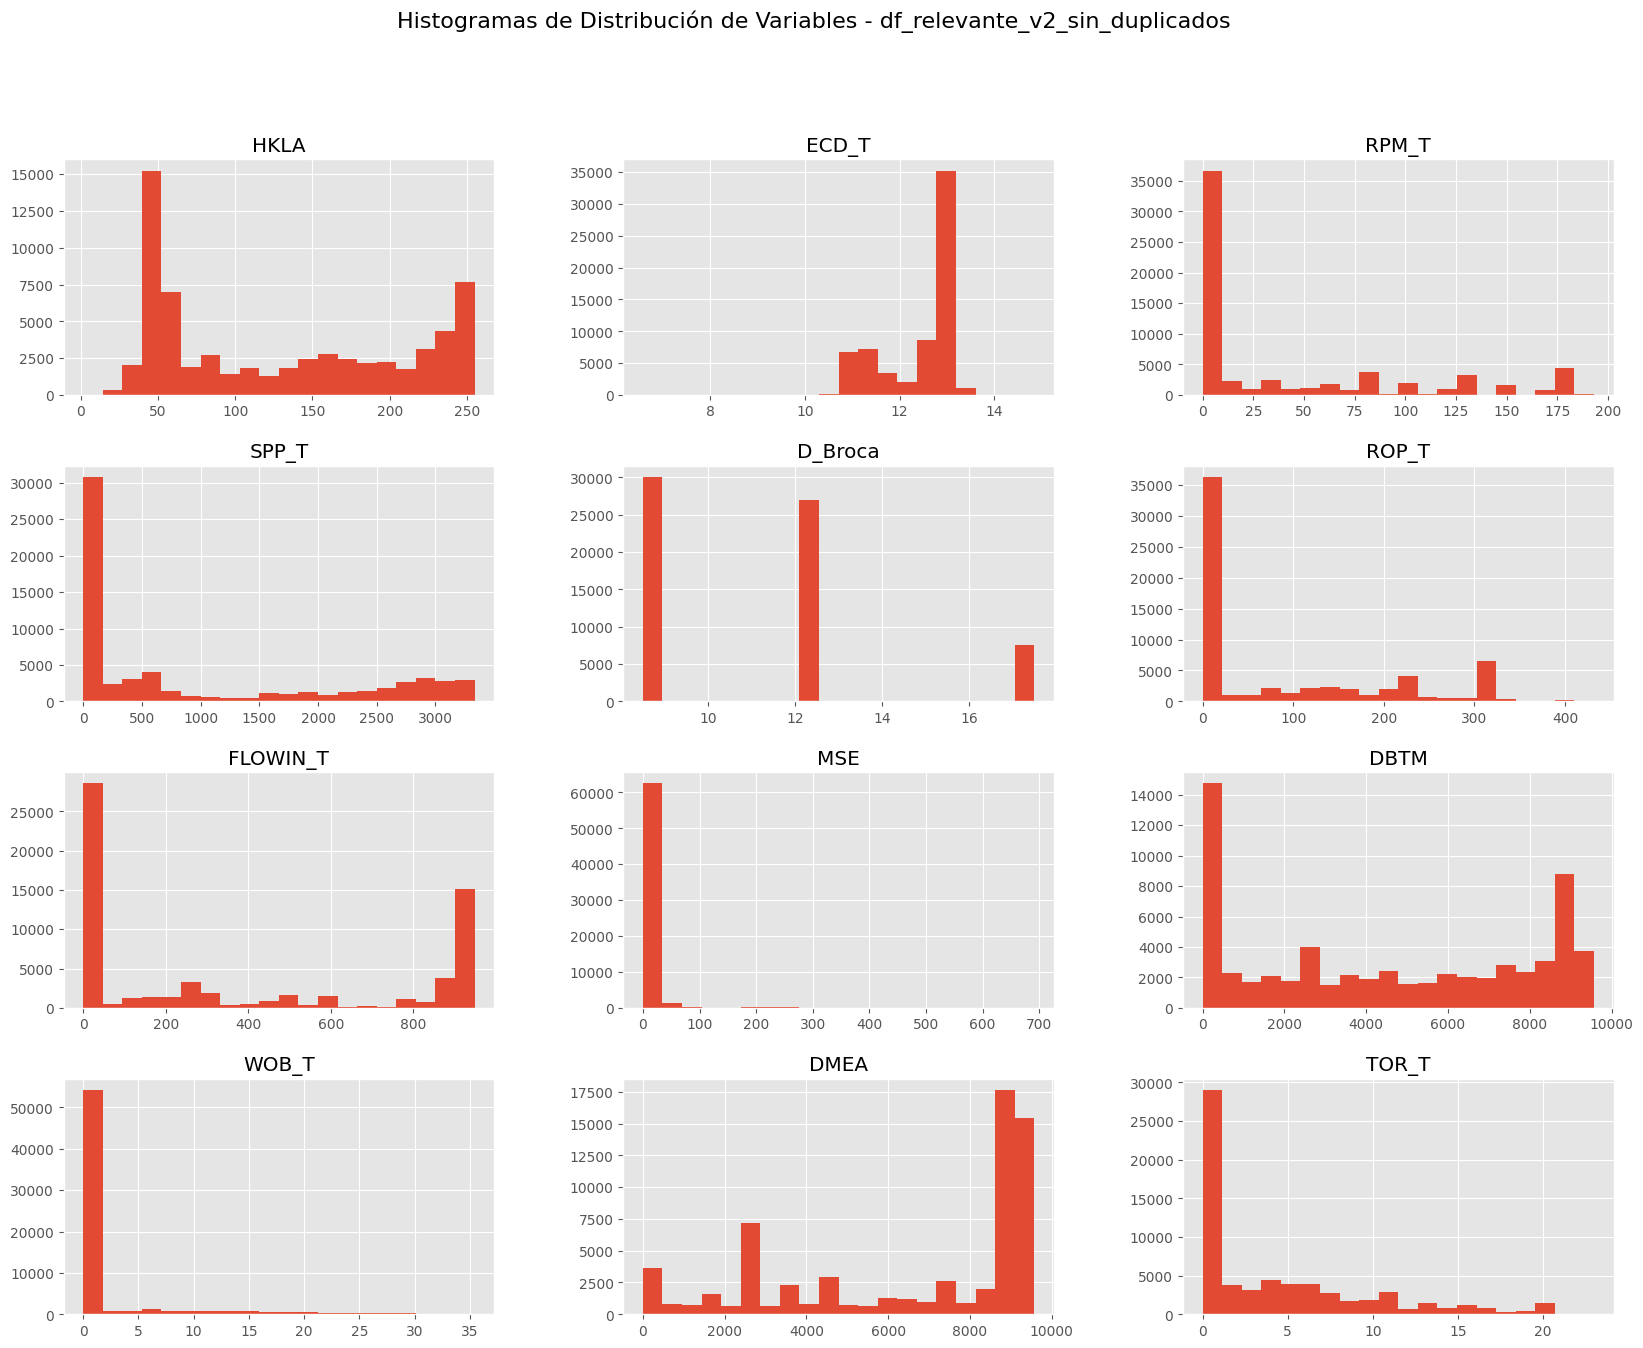

In [ ]:
import matplotlib.pyplot as plt

# Generar histogramas para cada variable en el DataFrame df_relevante_v2_sin_duplicados
df_relevante_v2_sin_duplicados.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramas de Distribución de Variables - df_relevante_v2_sin_duplicados", fontsize=16)
plt.show()


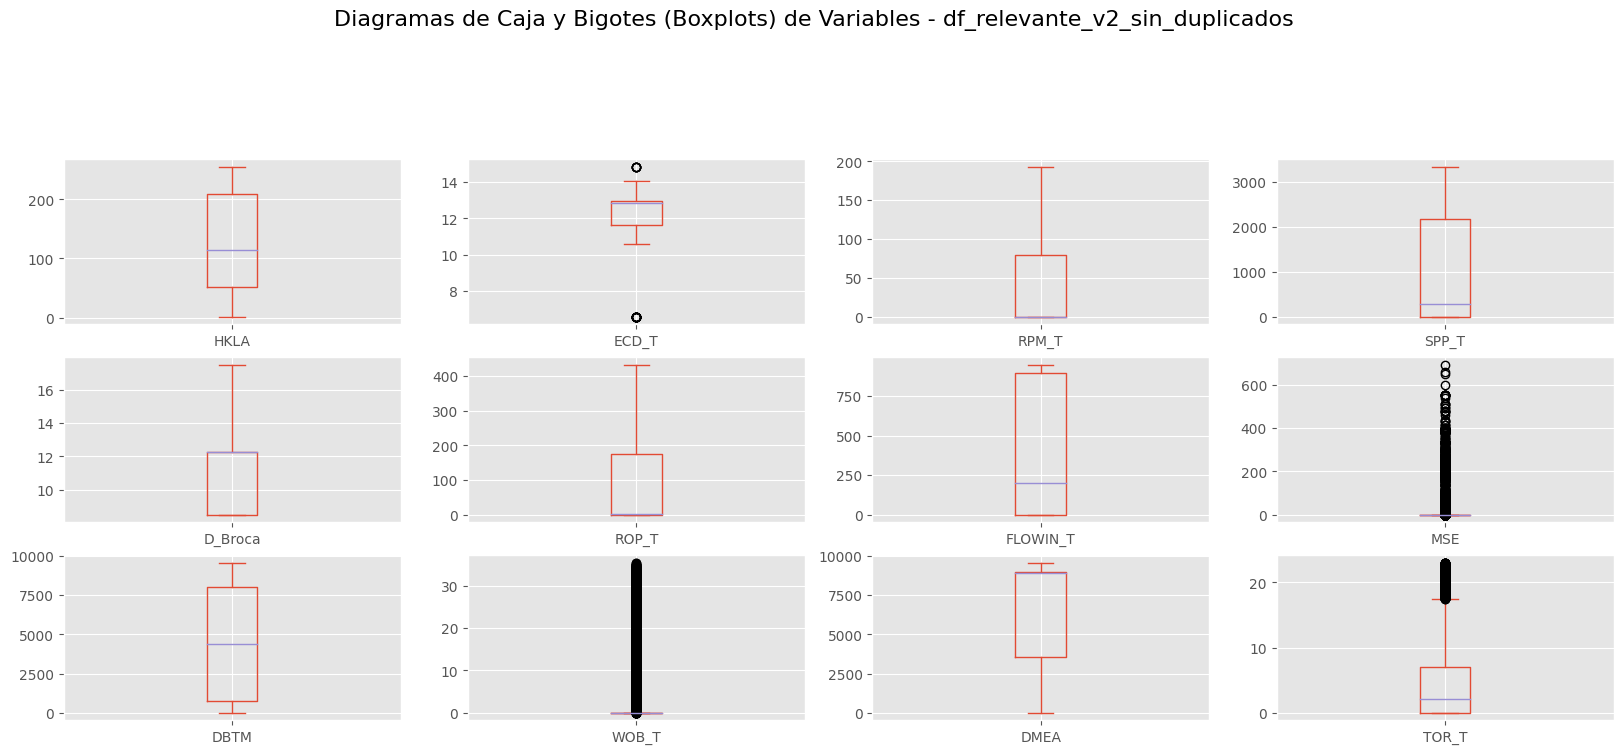

In [ ]:
# Generar boxplots para cada variable en el DataFrame df_relevante_v2_sin_duplicados
df_relevante_v2_sin_duplicados.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle("Diagramas de Caja y Bigotes (Boxplots) de Variables - df_relevante_v2_sin_duplicados", fontsize=16)
plt.show()


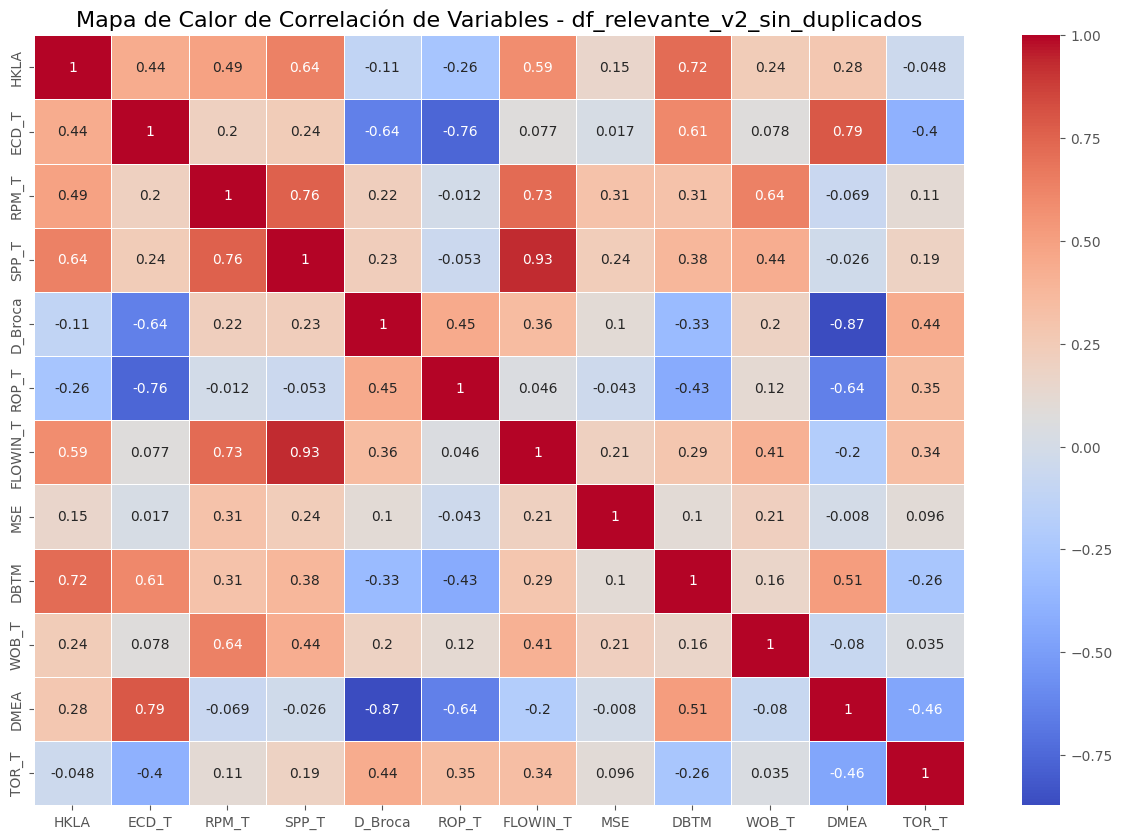

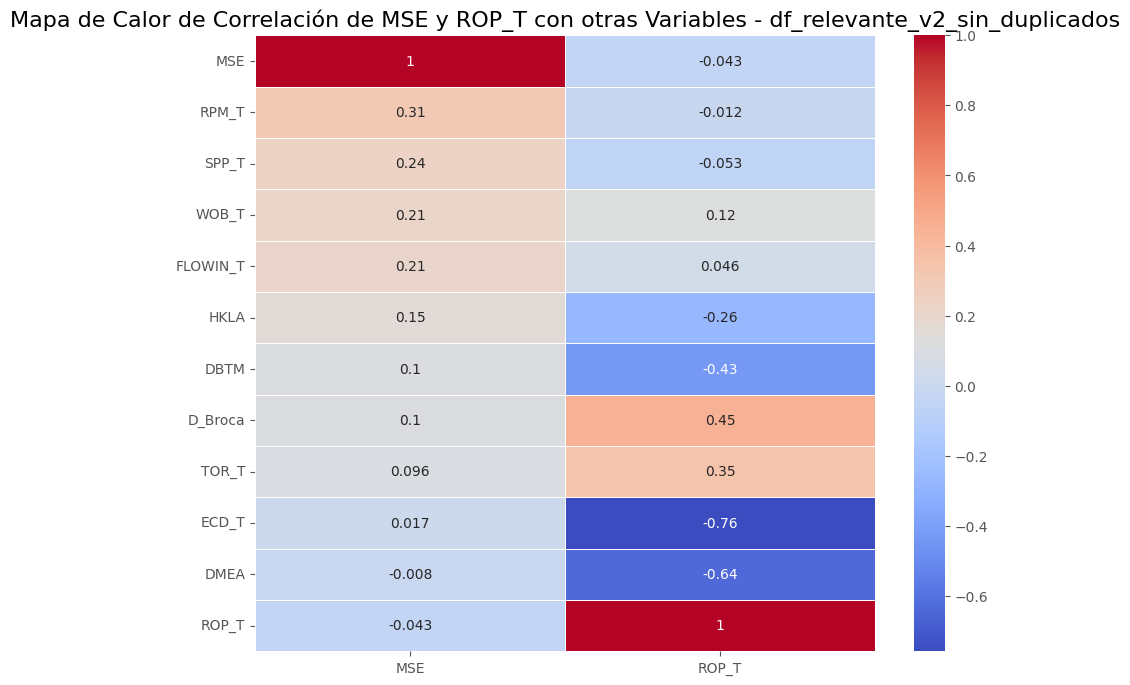

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación para df_relevante_v2_sin_duplicados
correlation_matrix_relevante = df_relevante_v2_sin_duplicados.corr()

# Generar un mapa de calor para la correlación de todas las variables en df_relevante_v2_sin_duplicados
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_relevante, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de Variables - df_relevante_v2_sin_duplicados", fontsize=16)
plt.show()

# Generar un mapa de calor específico para las correlaciones de MSE y ROP_T con otras variables en df_relevante_v2_sin_duplicados
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevante[['MSE', 'ROP_T']].sort_values(by='MSE', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de MSE y ROP_T con otras Variables - df_relevante_v2_sin_duplicados", fontsize=16)
plt.show()


In [ ]:
#Creación del TERCER dataframe utilizando la filtración de variables por relevancia (CORRELACIÓN CON VARIABLES OBJETIVO:0.3)
#----------------------------------------------------------------------------------------------------------------------
# Verificar si las columnas MSE y ROP_T están en el DataFrame
if 'MSE' not in df_1.columns or 'ROP_T' not in df_1.columns:
    raise ValueError("Las columnas 'MSE' o 'ROP_T' no se encuentran en el DataFrame.")

# 1. Establecer un umbral de correlación ajustado a 0.3
umbral = 0.3

# 2. Identificación de variables relevantes para MSE y ROP_T
mse_correlation = df_1.corr()['MSE'].dropna()  # Calcular correlación con MSE
rop_correlation = df_1.corr()['ROP_T'].dropna()  # Calcular correlación con ROP_T

variables_relevantes_mse = mse_correlation[abs(mse_correlation) > umbral].index
variables_relevantes_rop = rop_correlation[abs(rop_correlation) > umbral].index

# Combinar las variables relevantes para ambas variables objetivo
variables_relevantes = set(variables_relevantes_mse).union(set(variables_relevantes_rop))

# Convertir el conjunto a una lista
variables_relevantes = list(variables_relevantes)

print(f"Variables relevantes para MSE o ROP_T con correlación > {umbral}:")
print(variables_relevantes)

# 3. Crear un DataFrame con solo las variables relevantes con Correlación 0.3
df_relevante_v3 = df_1[variables_relevantes]

# Verificar el nuevo DataFrame procesado
print("\nDataFrame con variables relevantes basado en correlación:")
print(df_relevante_v3.info())

Variables relevantes para MSE o ROP_T con correlación > 0.3:
['ECD_T', 'RPM_T', 'DBTM', 'D_Broca', 'ROP_T', 'MSE', 'DMEA']

DataFrame con variables relevantes basado en correlación:
<class 'pandas.core.frame.DataFrame'>
Index: 69447 entries, 0.0 to 34723.0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ECD_T    69447 non-null  float64
 1   RPM_T    69447 non-null  float64
 2   DBTM     69447 non-null  float64
 3   D_Broca  69447 non-null  float64
 4   ROP_T    69447 non-null  float64
 5   MSE      69447 non-null  float64
 6   DMEA     69447 non-null  float64
dtypes: float64(7)
memory usage: 4.2 MB
None


In [ ]:
# Eliminación de filas duplicadas
df_relevante_v3_sin_duplicados = df_relevante_v3.drop_duplicates(subset=df_relevante_v3.columns.difference(['TIME']))

#  Verificación del DataFrame después de eliminar duplicados
print("DataFrame después de eliminar filas duplicadas (sin considerar TIME):")
print(df_relevante_v3_sin_duplicados.info())

DataFrame después de eliminar filas duplicadas (sin considerar TIME):
<class 'pandas.core.frame.DataFrame'>
Index: 41688 entries, 0.0 to 34720.0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ECD_T    41688 non-null  float64
 1   RPM_T    41688 non-null  float64
 2   DBTM     41688 non-null  float64
 3   D_Broca  41688 non-null  float64
 4   ROP_T    41688 non-null  float64
 5   MSE      41688 non-null  float64
 6   DMEA     41688 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB
None


In [ ]:
#  Verificación de que todas las columnas tengan el mismo número de datos
print("\nVerificación de la consistencia en el número de datos por columna:")
print(df_relevante_v3_sin_duplicados.count())


Verificación de la consistencia en el número de datos por columna:
ECD_T      41688
RPM_T      41688
DBTM       41688
D_Broca    41688
ROP_T      41688
MSE        41688
DMEA       41688
dtype: int64


In [ ]:
# 8. Verificación final de que no existan valores nulos
print("\nVerificación final de valores nulos en el DataFrame escalado:")
print(df_relevante_v3_sin_duplicados.isnull().sum())

# 9. Resumen final del DataFrame escalado
print("\nResumen final del DataFrame escalado:")
print(df_relevante_v3_sin_duplicados.describe())



Verificación final de valores nulos en el DataFrame escalado:
ECD_T      0
RPM_T      0
DBTM       0
D_Broca    0
ROP_T      0
MSE        0
DMEA       0
dtype: int64

Resumen final del DataFrame escalado:
                  ECD_T             RPM_T              DBTM           D_Broca  \
count  41688.0000000000  41688.0000000000  41688.0000000000  41688.0000000000   
mean      12.4983317882     62.4870757863   5376.9991962046     11.4712507196   
std        0.7114493512     65.4146563670   3050.7941530195      2.8682934347   
min        6.5700000000      0.0000000000      0.0000000000      8.5000000000   
25%       12.1560000000      0.0000000000   2603.4800000000      8.5000000000   
50%       12.8400000000     40.0000000000   5840.3075000000     12.2500000000   
75%       12.9620000000    120.0000000000   8326.1500000000     12.2500000000   
max       14.8500000000    193.1072000000   9572.0200000000     17.5000000000   

                  ROP_T               MSE              DMEA  
co

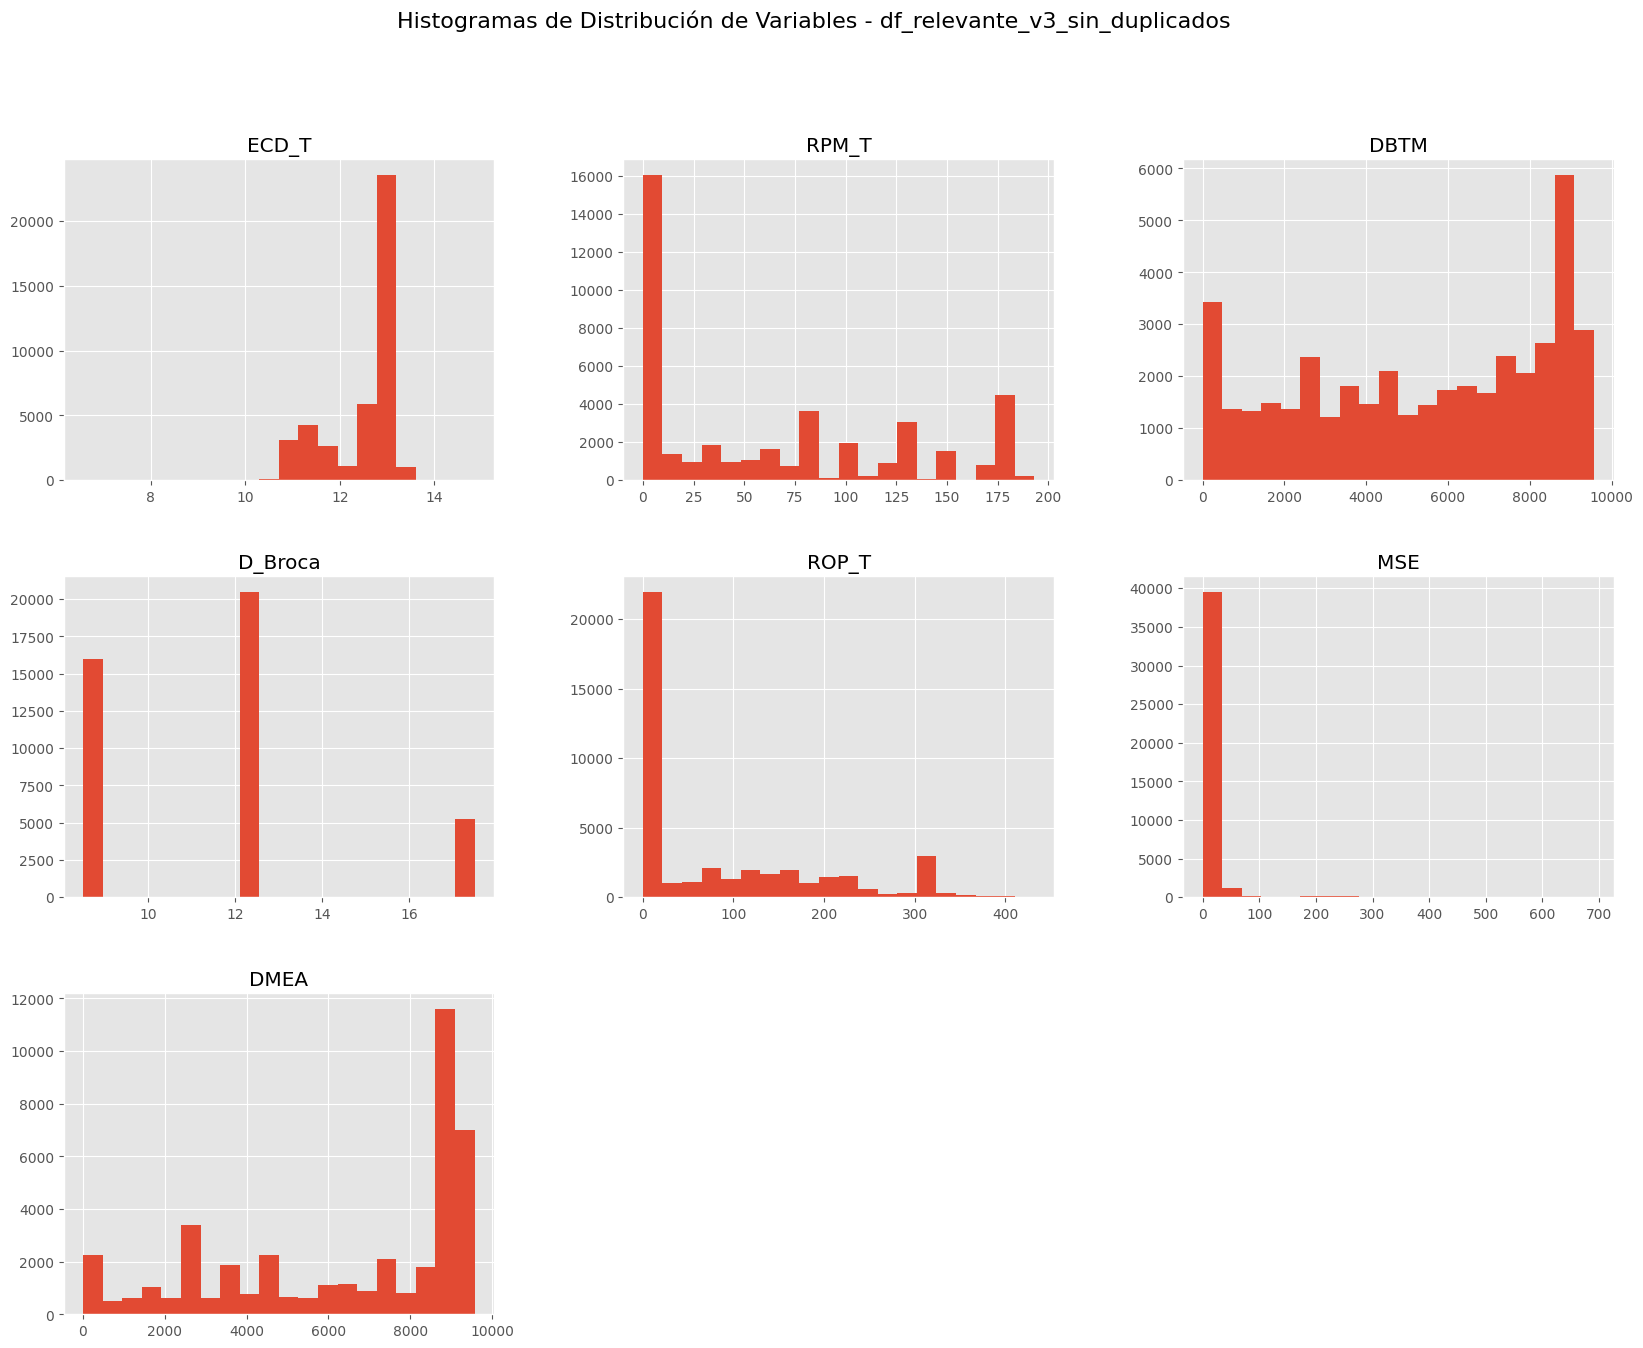

In [ ]:
import matplotlib.pyplot as plt

# Generar histogramas para cada variable en el DataFrame df_relevante_v3_sin_duplicados
df_relevante_v3_sin_duplicados.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramas de Distribución de Variables - df_relevante_v3_sin_duplicados", fontsize=16)
plt.show()


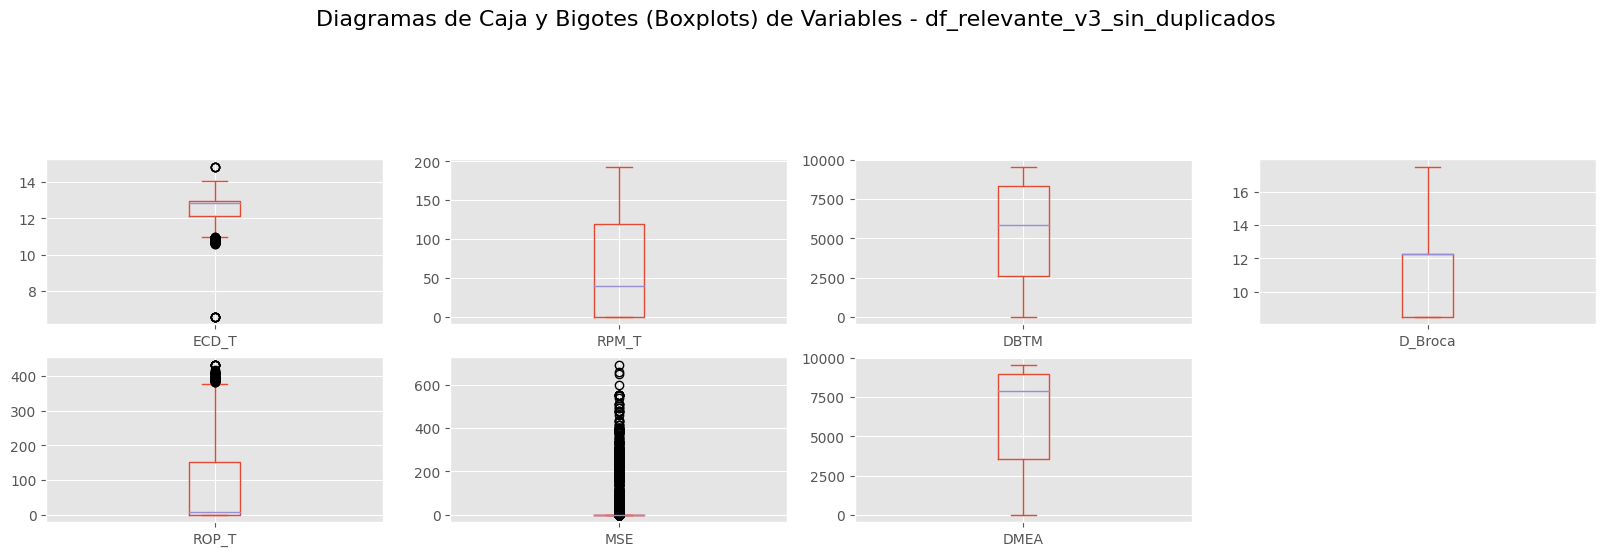

In [ ]:
# Generar boxplots para cada variable en el DataFrame df_relevante_v3_sin_duplicados
df_relevante_v3_sin_duplicados.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle("Diagramas de Caja y Bigotes (Boxplots) de Variables - df_relevante_v3_sin_duplicados", fontsize=16)
plt.show()


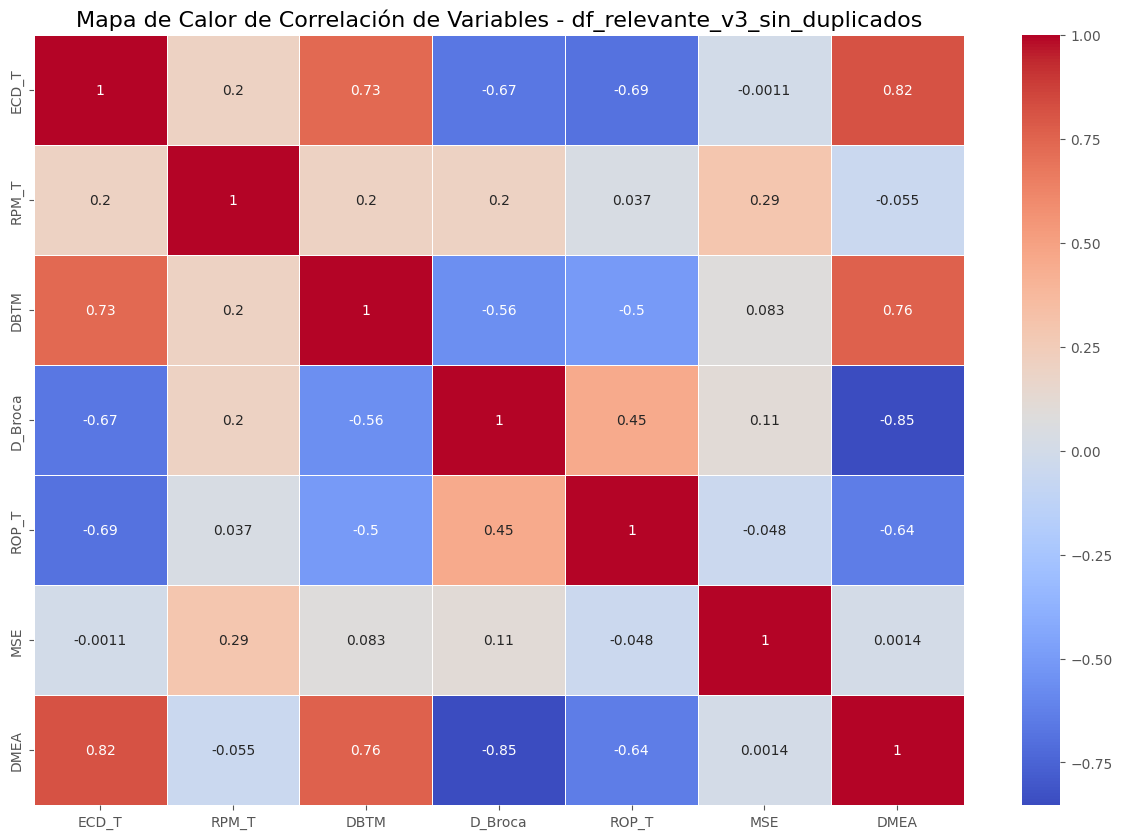

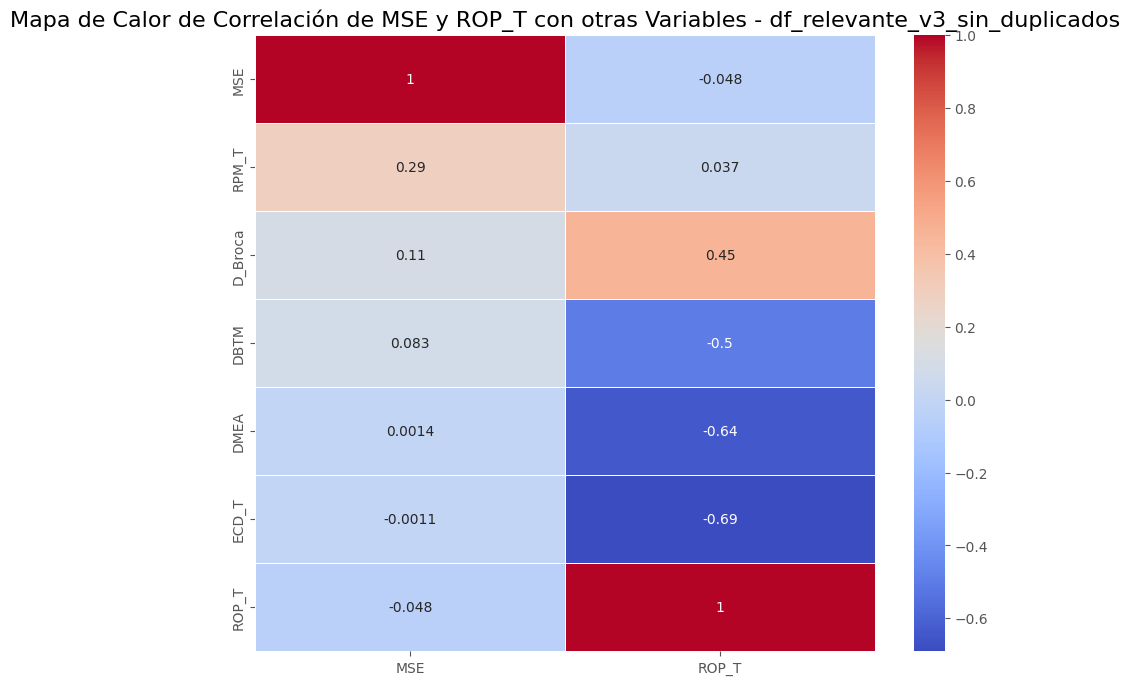

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación para df_relevante_v3_sin_duplicados
correlation_matrix_relevante = df_relevante_v3_sin_duplicados.corr()

# Generar un mapa de calor para la correlación de todas las variables en df_relevante_v3_sin_duplicados
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_relevante, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de Variables - df_relevante_v3_sin_duplicados", fontsize=16)
plt.show()

# Generar un mapa de calor específico para las correlaciones de MSE y ROP_T con otras variables en df_relevante_v3_sin_duplicados
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevante[['MSE', 'ROP_T']].sort_values(by='MSE', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlación de MSE y ROP_T con otras Variables - df_relevante_v3_sin_duplicados", fontsize=16)
plt.show()

Modelo guardado en Linear_Regression_MSE_modelo.sav
Modelo guardado en Random_Forest_MSE_modelo.sav
Modelo guardado en MLP_Neural_Network_MSE_modelo.sav


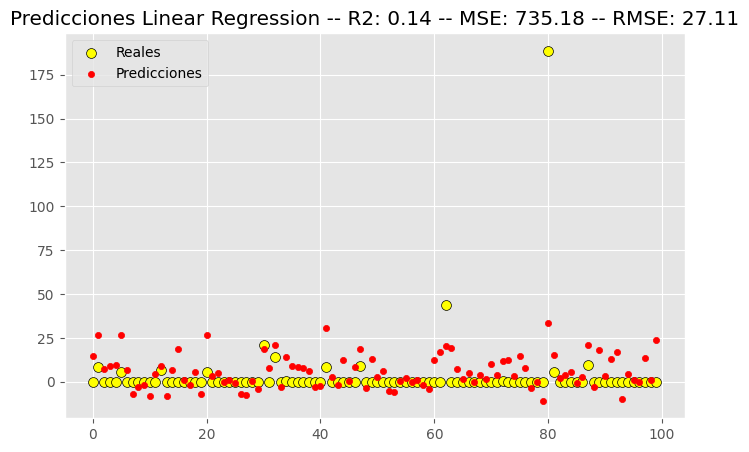

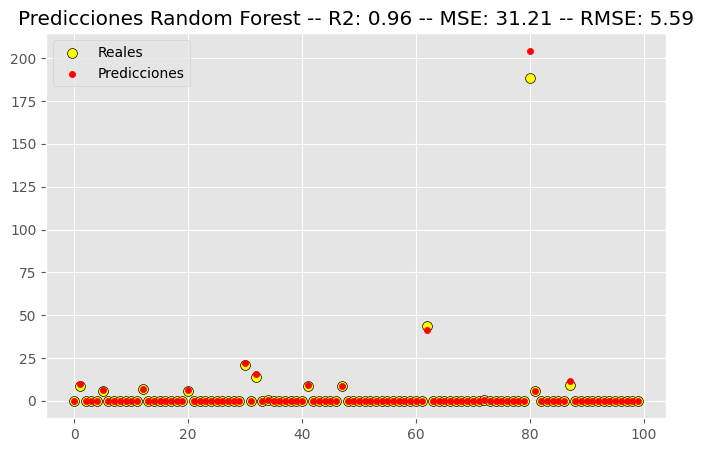

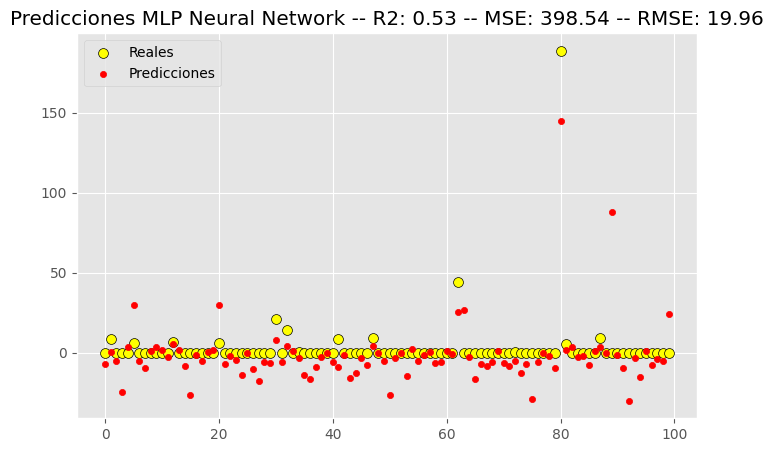

Modelo guardado en Linear_Regression_ROP_T_modelo.sav
Modelo guardado en Random_Forest_ROP_T_modelo.sav
Modelo guardado en MLP_Neural_Network_ROP_T_modelo.sav


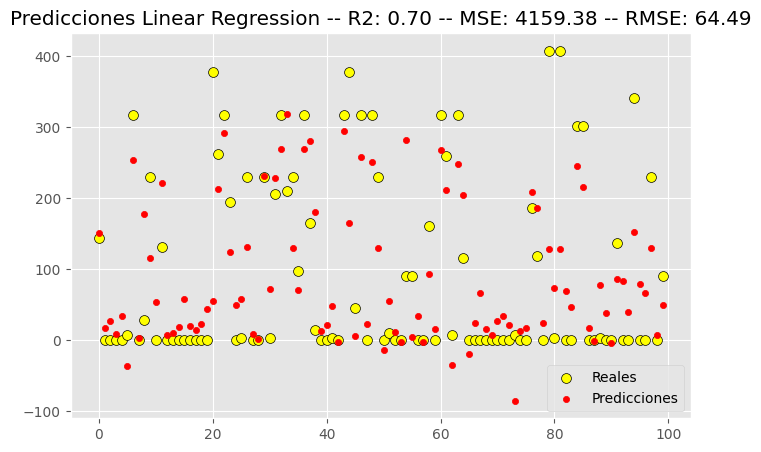

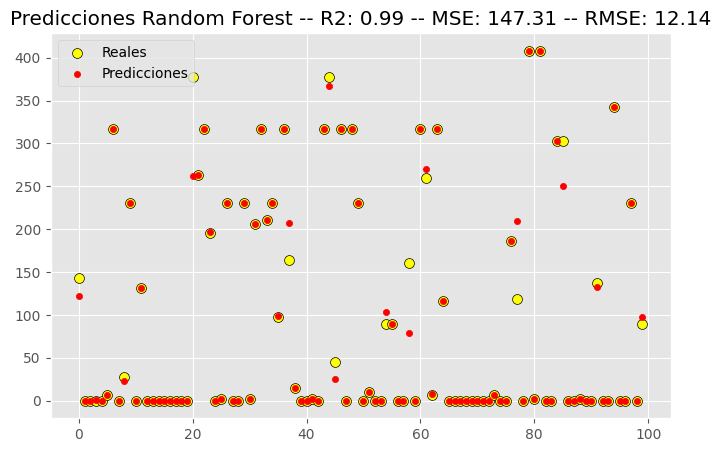

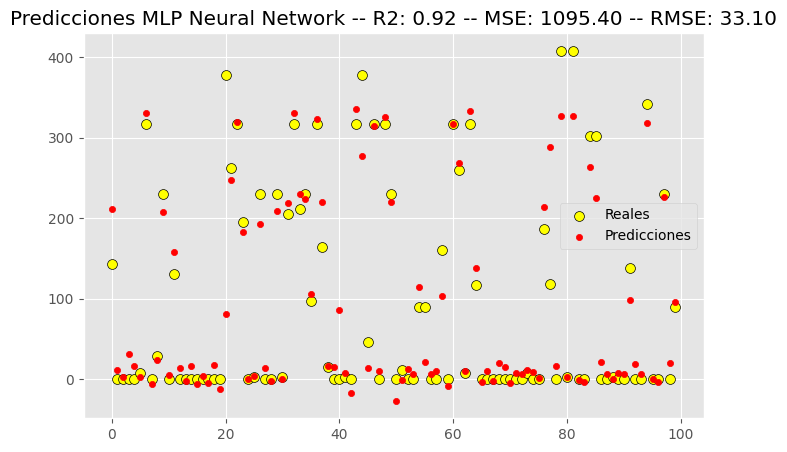

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import pandas as pd

# Función para entrenar, evaluar y guardar los modelos
def entrenar_evaluar_y_guardar(X_train, X_test, y_train, y_test, variable_objetivo):
    regresores = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("MLP Neural Network", MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
    ]

    points = [random.randint(1, X_test.shape[0]) for _ in range(100)]

    for nombre, regresor in regresores:
        # Entrenamiento del modelo
        regresor.fit(X_train, y_train)

        # Predicciones sobre los datos de prueba
        predicciones = regresor.predict(X_test)

        # Selección de puntos aleatorios para visualización
        xpoints = [i for i in range(100)]
        ypoints = predicciones[points]
        reales = y_test.iloc[points]

        # Visualización de los resultados
        fig = plt.figure(figsize=(8, 5))
        plt.scatter(xpoints, reales, s=50, edgecolors='black', c='yellow', label='Reales')
        plt.scatter(xpoints, ypoints, s=20, c='red', label='Predicciones')

        # Cálculo de métricas
        MSE = mean_squared_error(y_test, predicciones)
        R2 = r2_score(y_test, predicciones)
        RMSE = np.sqrt(MSE)

        plt.title(f'Predicciones {nombre} -- R2: {R2:.2f} -- MSE: {MSE:.2f} -- RMSE: {RMSE:.2f}')
        plt.legend()

        # Guardar el modelo entrenado
        filename = f"{nombre.replace(' ', '_')}_{variable_objetivo}_modelo.sav"
        pickle.dump(regresor, open(filename, 'wb'))
        print(f"Modelo guardado en {filename}")

    plt.show()

# Preparación de los datos del dataframe 1

#-----------------------------------------------------

# Usar los datos tal como están, sin aplicar transformaciones
X_v1 = df_relevante_v1_sin_duplicados.drop(columns=['ROP_T', 'MSE'])  # Características
y_v1 = df_relevante_v1_sin_duplicados[['ROP_T', 'MSE']]  # Variables objetivo

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.2, random_state=42)


# Evaluación y visualización de resultados:

# Para MSE
entrenar_evaluar_y_guardar(X_train_v1, X_test_v1, y_train_v1['MSE'], y_test_v1['MSE'], 'MSE')

# Para ROP_T
entrenar_evaluar_y_guardar(X_train_v1, X_test_v1, y_train_v1['ROP_T'], y_test_v1['ROP_T'], 'ROP_T')


Modelo guardado en Linear_Regression_MSE_modelo2.sav
Modelo guardado en Random_Forest_MSE_modelo2.sav
Modelo guardado en MLP_Neural_Network_MSE_modelo2.sav


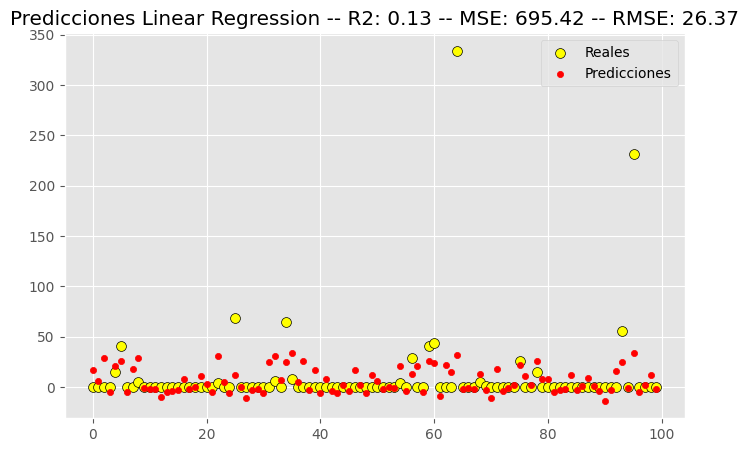

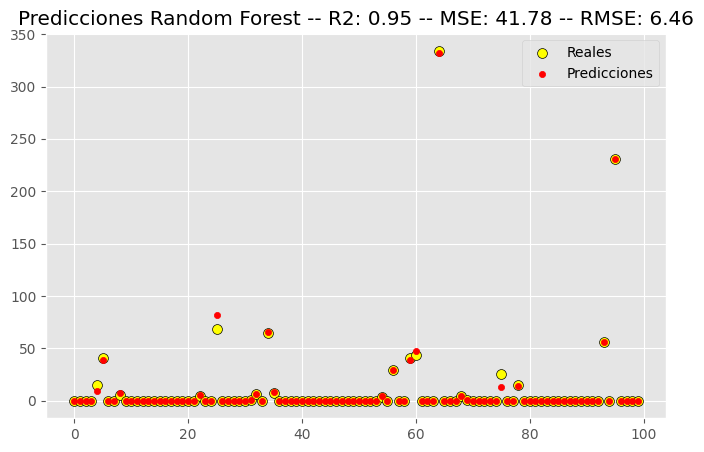

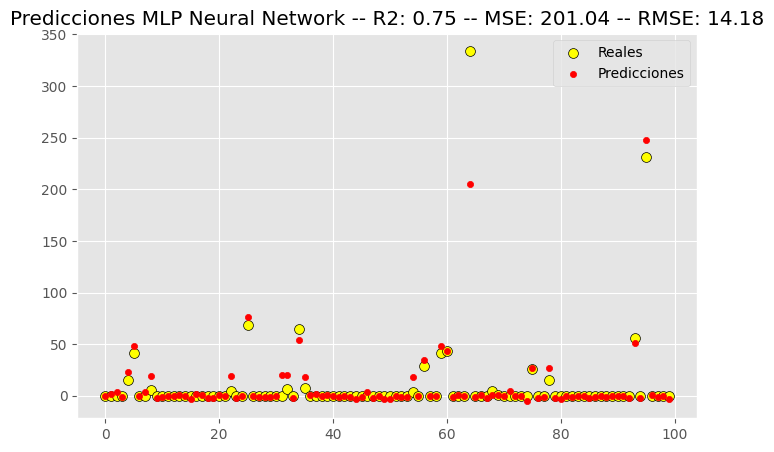

Modelo guardado en Linear_Regression_ROP_T_modelo2.sav
Modelo guardado en Random_Forest_ROP_T_modelo2.sav
Modelo guardado en MLP_Neural_Network_ROP_T_modelo2.sav


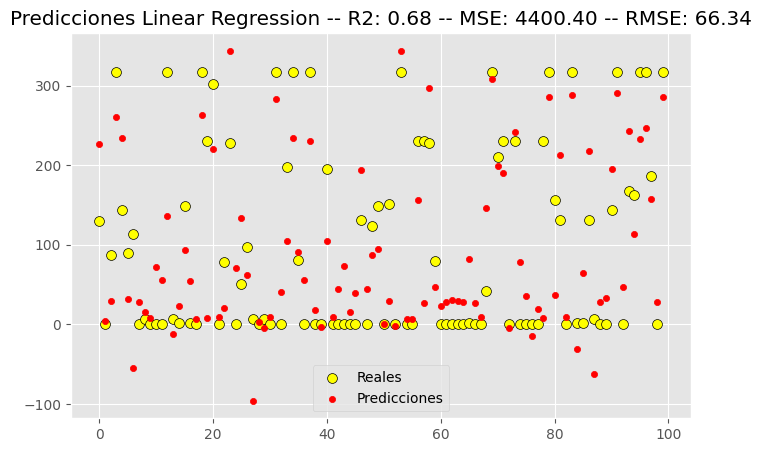

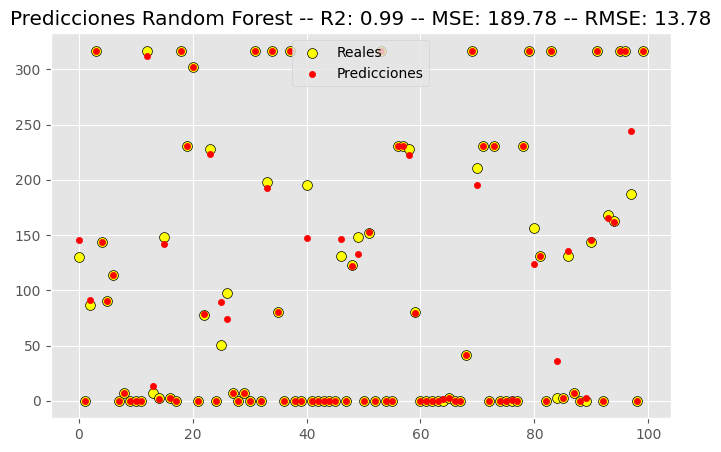

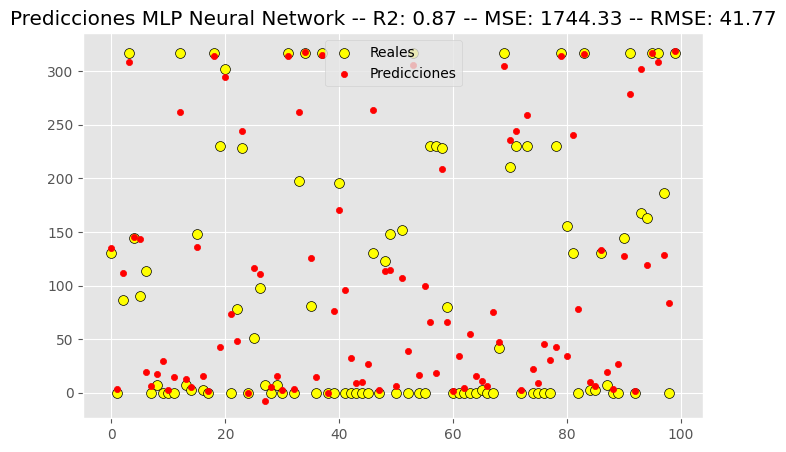

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import pandas as pd

# Función para entrenar, evaluar y guardar los modelos
def entrenar_evaluar_y_guardar(X_train, X_test, y_train, y_test, variable_objetivo):
    regresores = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("MLP Neural Network", MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
    ]

    points = [random.randint(1, X_test.shape[0]) for _ in range(100)]

    for nombre, regresor in regresores:
        # Entrenamiento del modelo
        regresor.fit(X_train, y_train)

        # Predicciones sobre los datos de prueba
        predicciones = regresor.predict(X_test)

        # Selección de puntos aleatorios para visualización
        xpoints = [i for i in range(100)]
        ypoints = predicciones[points]
        reales = y_test.iloc[points]

        # Visualización de los resultados
        fig = plt.figure(figsize=(8, 5))
        plt.scatter(xpoints, reales, s=50, edgecolors='black', c='yellow', label='Reales')
        plt.scatter(xpoints, ypoints, s=20, c='red', label='Predicciones')

        # Cálculo de métricas
        MSE = mean_squared_error(y_test, predicciones)
        R2 = r2_score(y_test, predicciones)
        RMSE = np.sqrt(MSE)

        plt.title(f'Predicciones {nombre} -- R2: {R2:.2f} -- MSE: {MSE:.2f} -- RMSE: {RMSE:.2f}')
        plt.legend()

        # Guardar el modelo entrenado
        filename = f"{nombre.replace(' ', '_')}_{variable_objetivo}_modelo2.sav"
        pickle.dump(regresor, open(filename, 'wb'))
        print(f"Modelo guardado en {filename}")

    plt.show()

# Preparación de los datos del dataframe 2

#-----------------------------------------------------

# Usar los datos tal como están, sin aplicar transformaciones
X_v2 = df_relevante_v2_sin_duplicados.drop(columns=['ROP_T', 'MSE'])  # Características
y_v2 = df_relevante_v2_sin_duplicados[['ROP_T', 'MSE']]  # Variables objetivo

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)


# Evaluación y visualización de resultados:

# Para MSE
entrenar_evaluar_y_guardar(X_train_v2, X_test_v2, y_train_v2['MSE'], y_test_v2['MSE'], 'MSE')

# Para ROP_T
entrenar_evaluar_y_guardar(X_train_v2, X_test_v2, y_train_v2['ROP_T'], y_test_v2['ROP_T'], 'ROP_T')

Modelo guardado en Linear_Regression_MSE_modelo3.sav
Modelo guardado en Random_Forest_MSE_modelo3.sav
Modelo guardado en MLP_Neural_Network_MSE_modelo3.sav


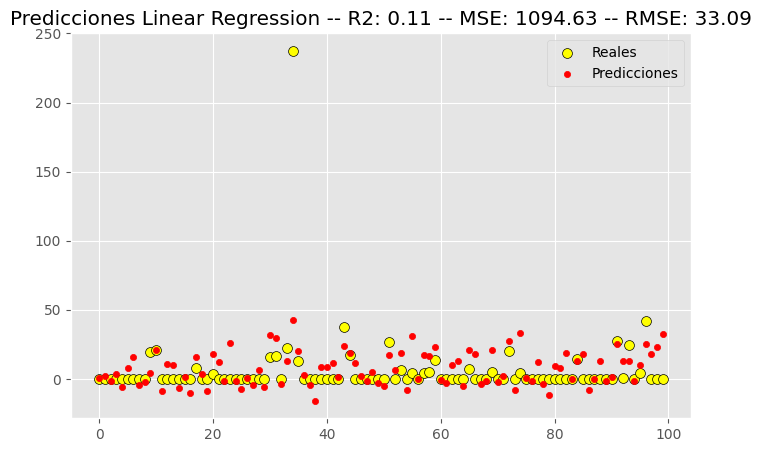

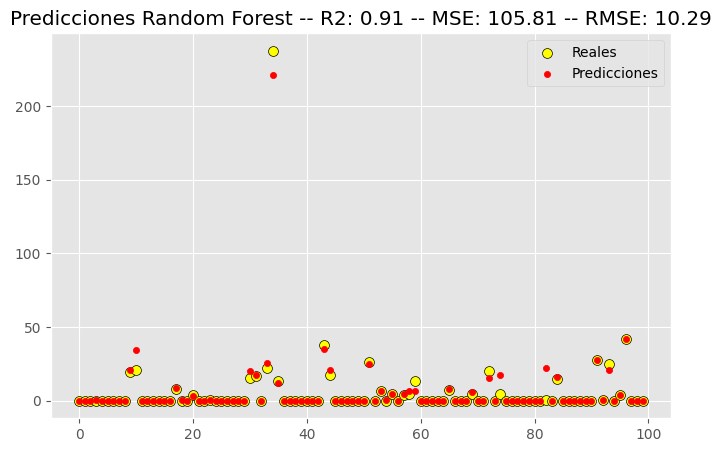

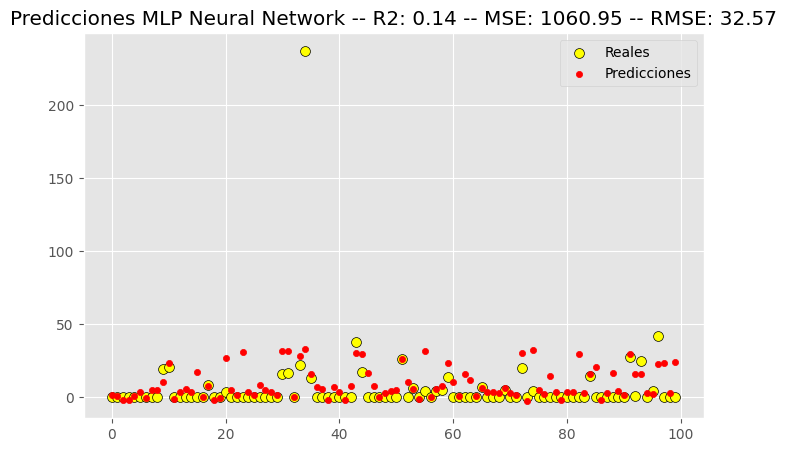

Modelo guardado en Linear_Regression_ROP_T_modelo3.sav
Modelo guardado en Random_Forest_ROP_T_modelo3.sav
Modelo guardado en MLP_Neural_Network_ROP_T_modelo3.sav


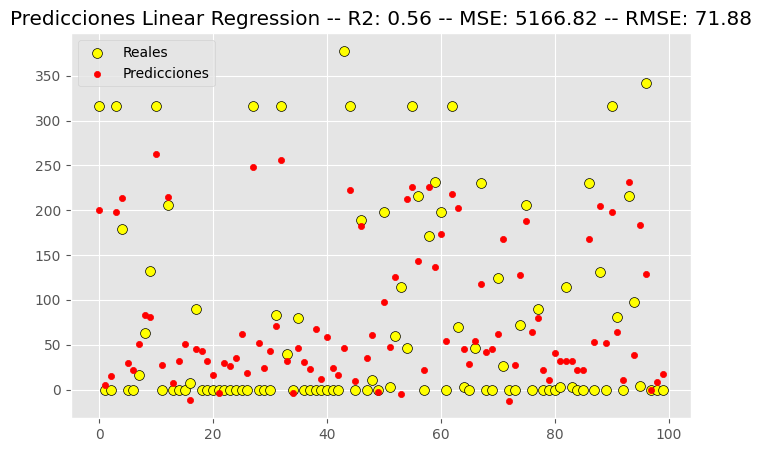

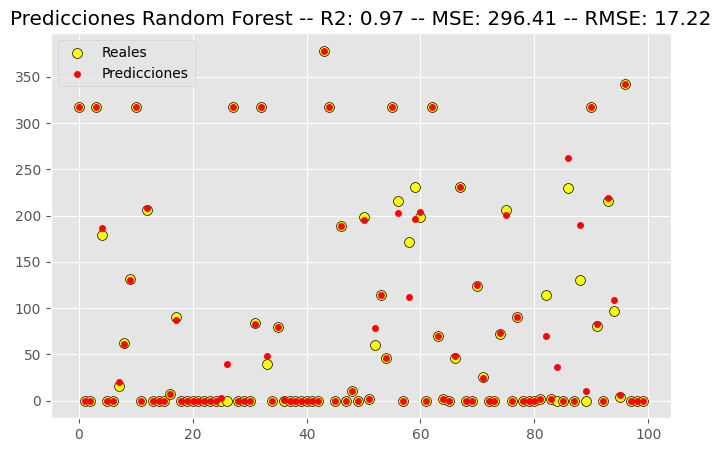

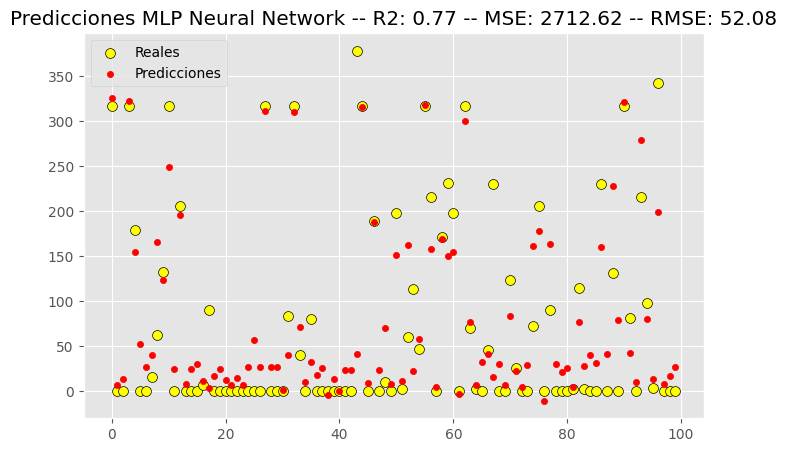

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import pandas as pd

# Función para entrenar, evaluar y guardar los modelos
def entrenar_evaluar_y_guardar(X_train, X_test, y_train, y_test, variable_objetivo):
    regresores = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("MLP Neural Network", MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
    ]

    points = [random.randint(1, X_test.shape[0]) for _ in range(100)]

    for nombre, regresor in regresores:
        # Entrenamiento del modelo
        regresor.fit(X_train, y_train)

        # Predicciones sobre los datos de prueba
        predicciones = regresor.predict(X_test)

        # Selección de puntos aleatorios para visualización
        xpoints = [i for i in range(100)]
        ypoints = predicciones[points]
        reales = y_test.iloc[points]

        # Visualización de los resultados
        fig = plt.figure(figsize=(8, 5))
        plt.scatter(xpoints, reales, s=50, edgecolors='black', c='yellow', label='Reales')
        plt.scatter(xpoints, ypoints, s=20, c='red', label='Predicciones')

        # Cálculo de métricas
        MSE = mean_squared_error(y_test, predicciones)
        R2 = r2_score(y_test, predicciones)
        RMSE = np.sqrt(MSE)

        plt.title(f'Predicciones {nombre} -- R2: {R2:.2f} -- MSE: {MSE:.2f} -- RMSE: {RMSE:.2f}')
        plt.legend()

        # Guardar el modelo entrenado
        filename = f"{nombre.replace(' ', '_')}_{variable_objetivo}_modelo3.sav"
        pickle.dump(regresor, open(filename, 'wb'))
        print(f"Modelo guardado en {filename}")

    plt.show()

# Preparación de los datos del dataframe 3

#-----------------------------------------------------

# Usar los datos tal como están, sin aplicar transformaciones
X_v3 = df_relevante_v3_sin_duplicados.drop(columns=['ROP_T', 'MSE'])  # Características
y_v3 = df_relevante_v3_sin_duplicados[['ROP_T', 'MSE']]  # Variables objetivo

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)


# Evaluación y visualización de resultados:

# Para MSE
entrenar_evaluar_y_guardar(X_train_v3, X_test_v3, y_train_v3['MSE'], y_test_v3['MSE'], 'MSE')

# Para ROP_T
entrenar_evaluar_y_guardar(X_train_v3, X_test_v3, y_train_v3['ROP_T'], y_test_v3['ROP_T'], 'ROP_T')